A2RJ53


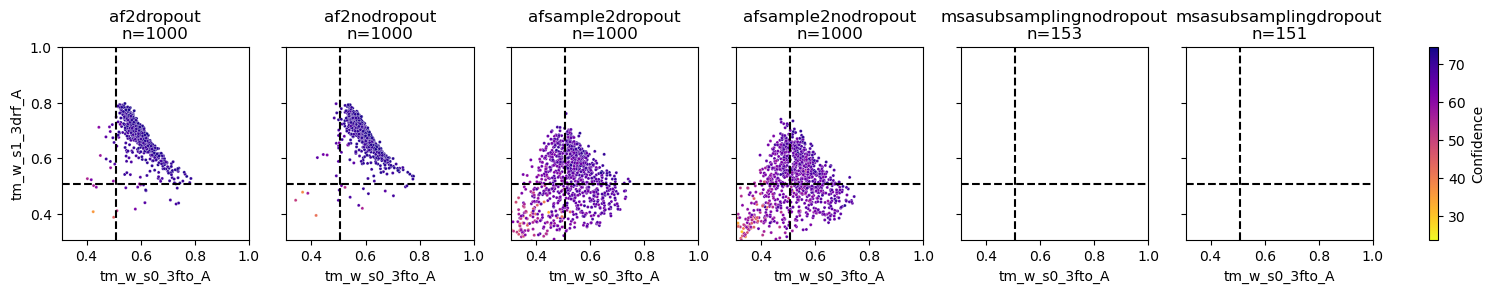

O76728


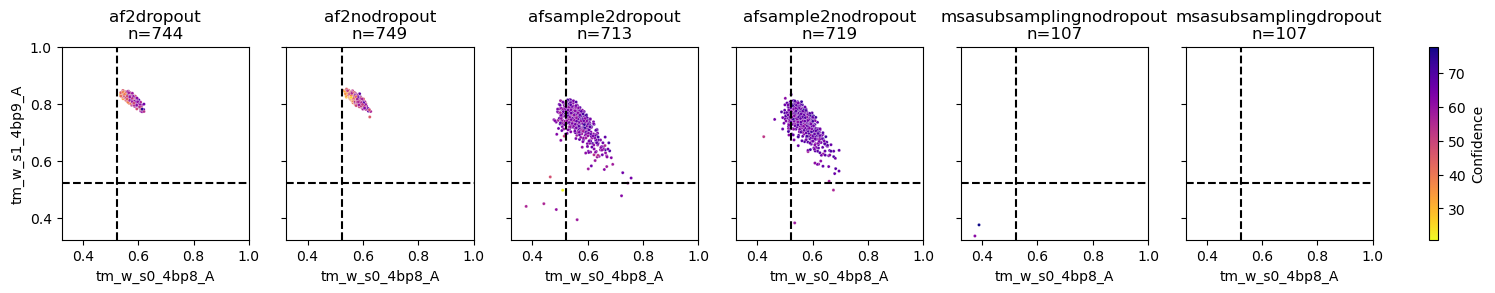

P31133


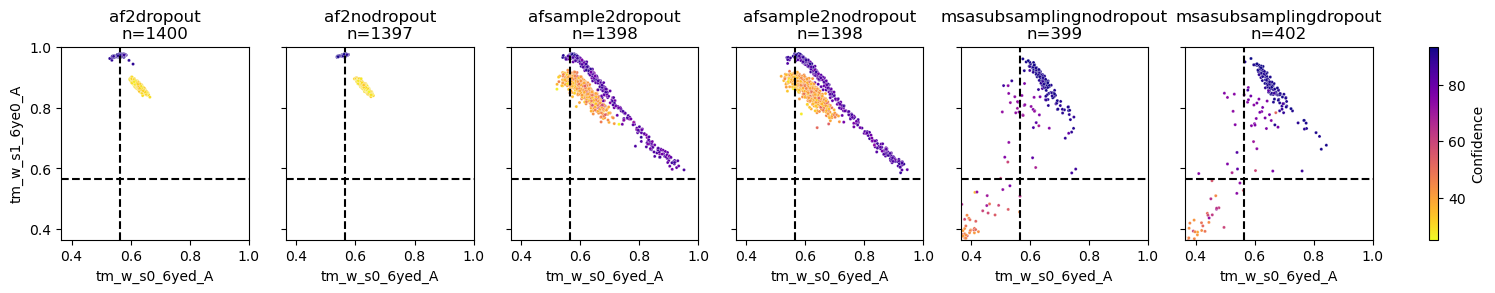

P00558


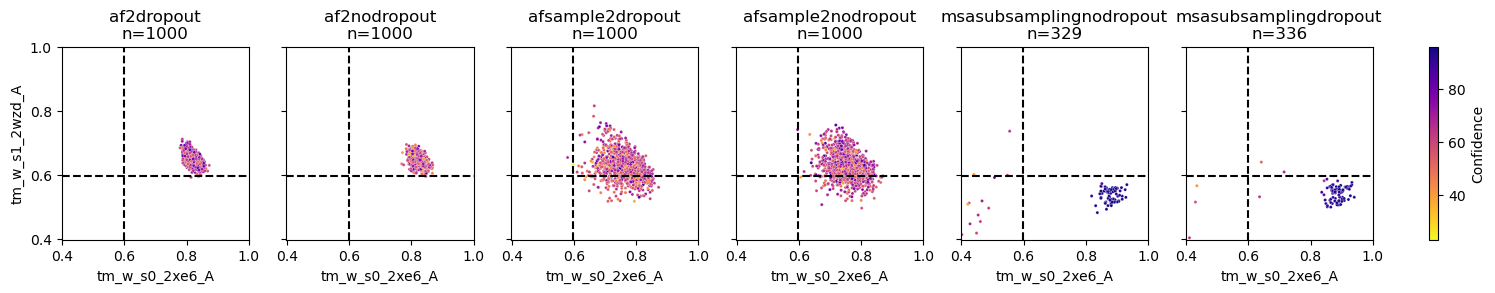

P40131


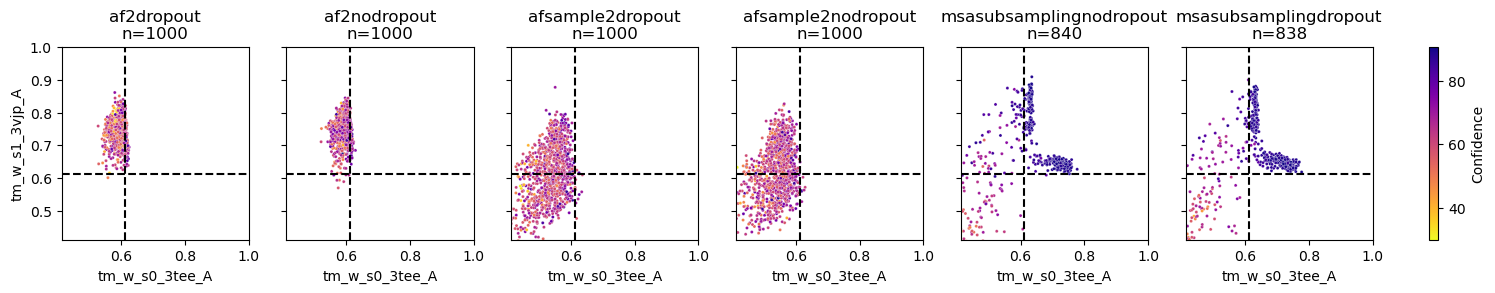

Q7DAU8


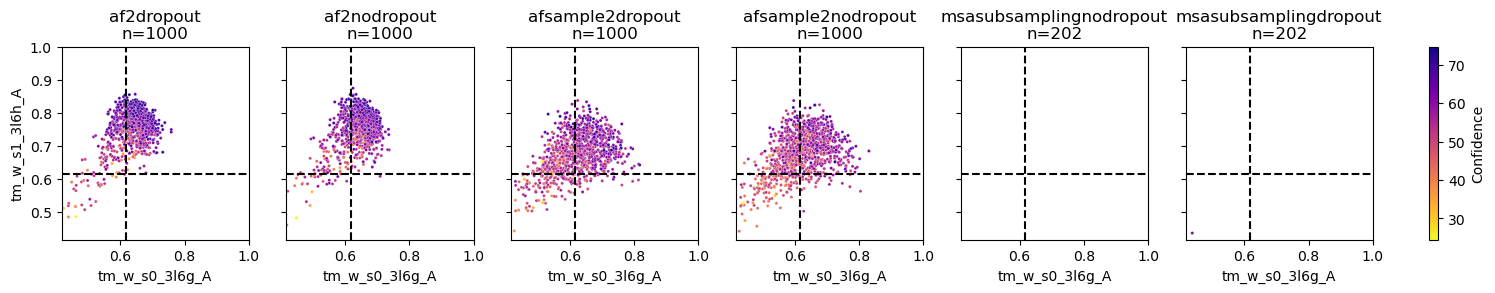

P21589


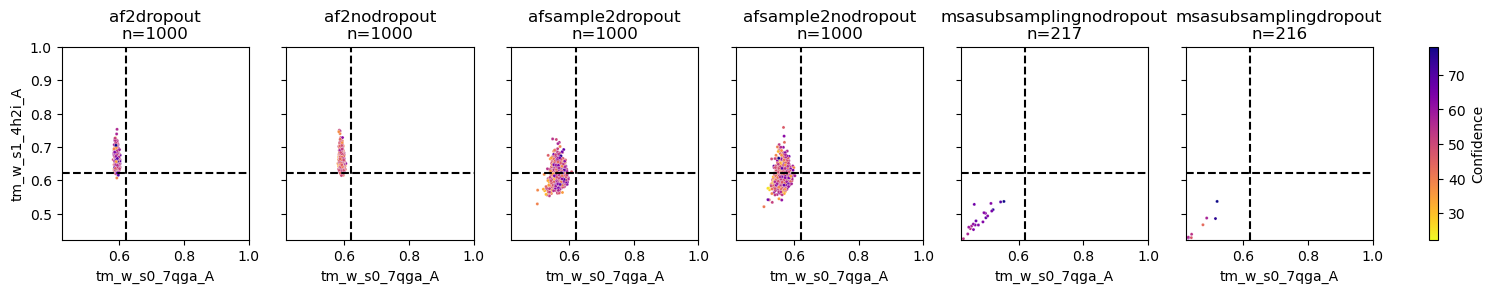

A0QTT2


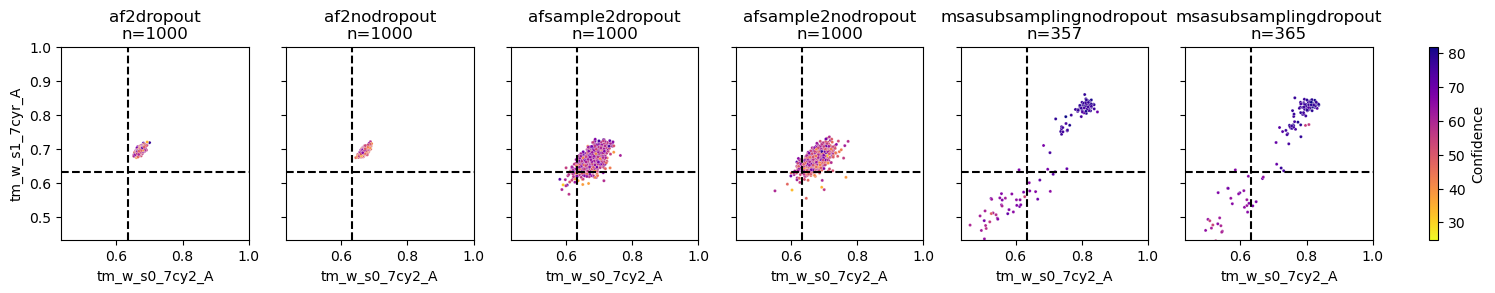

Q5F9M1


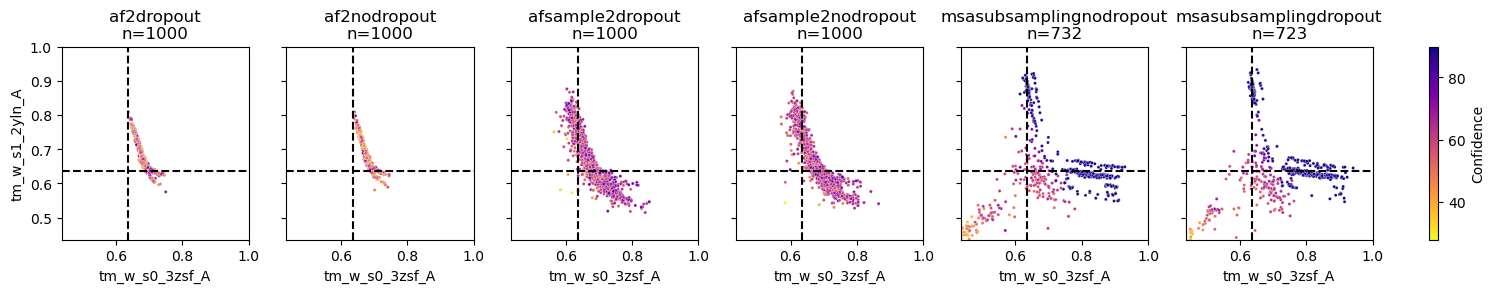

Q9X6R4


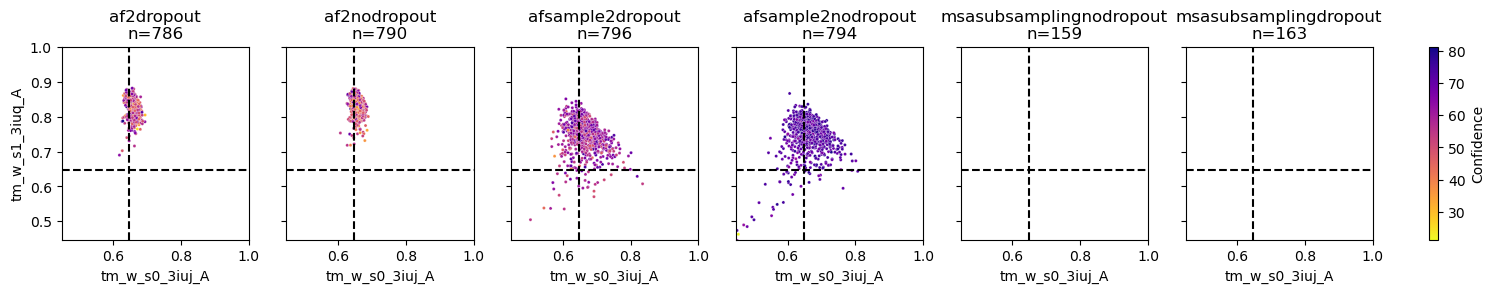

Q18A65


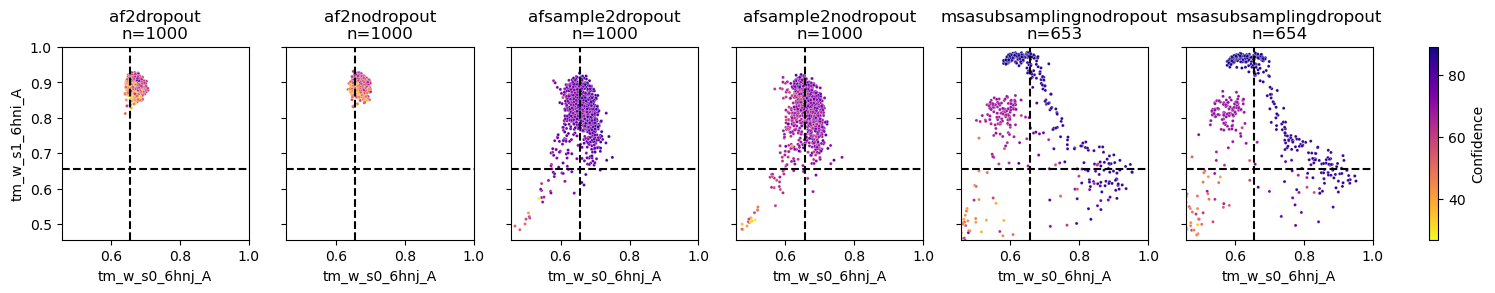

Q9ERE7


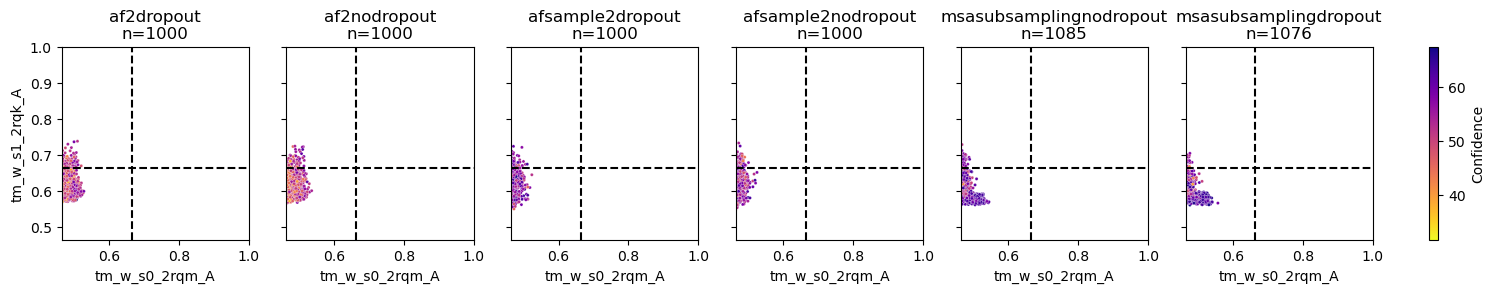

P62495


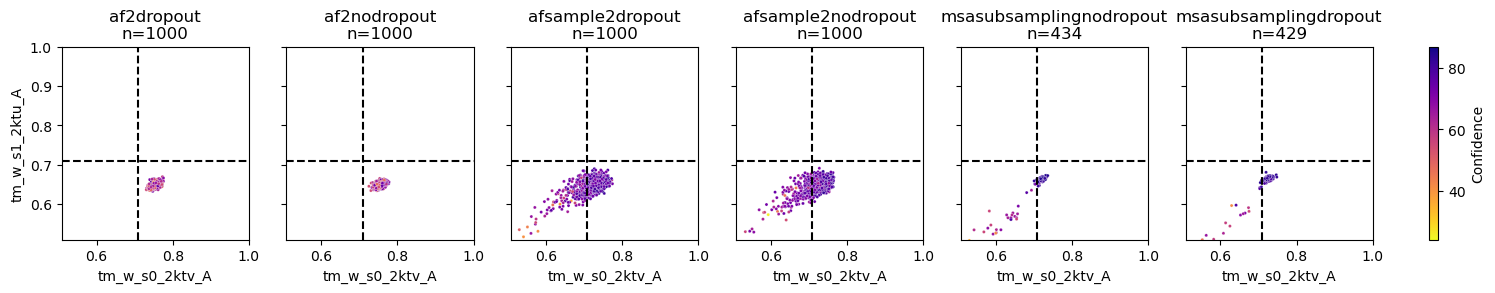

A0A075Q0W3


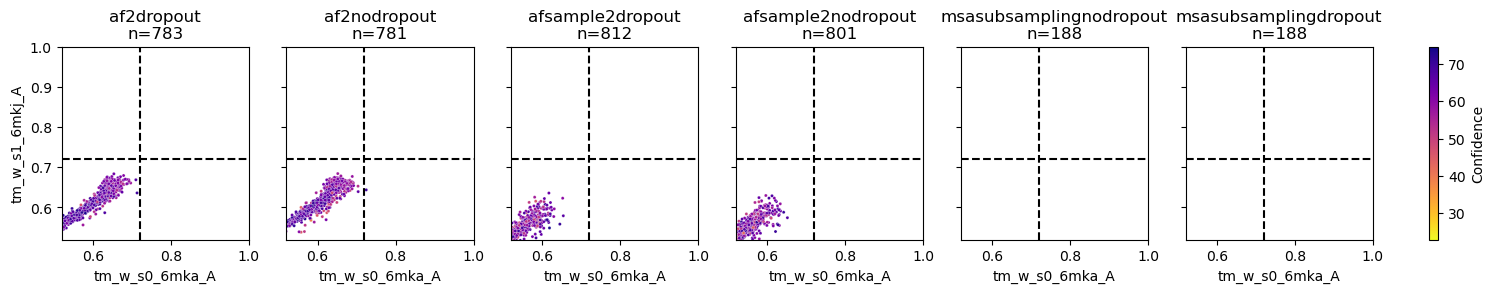

P71447


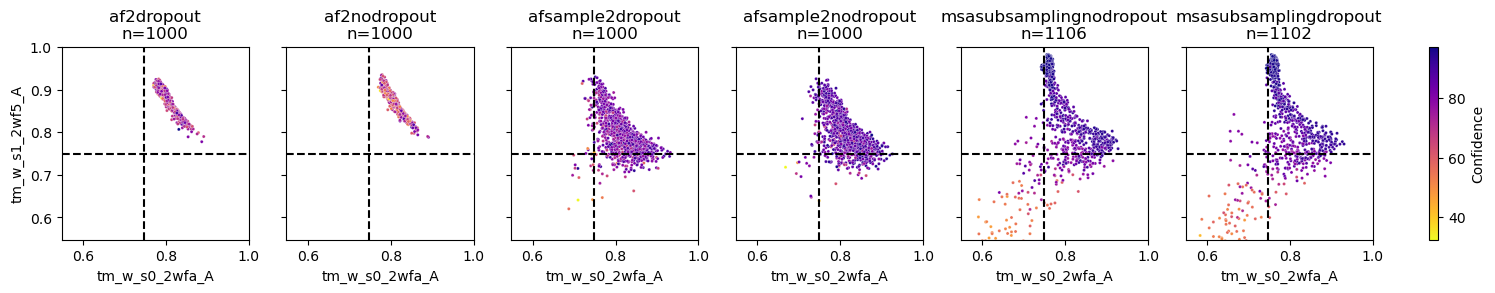

P33284


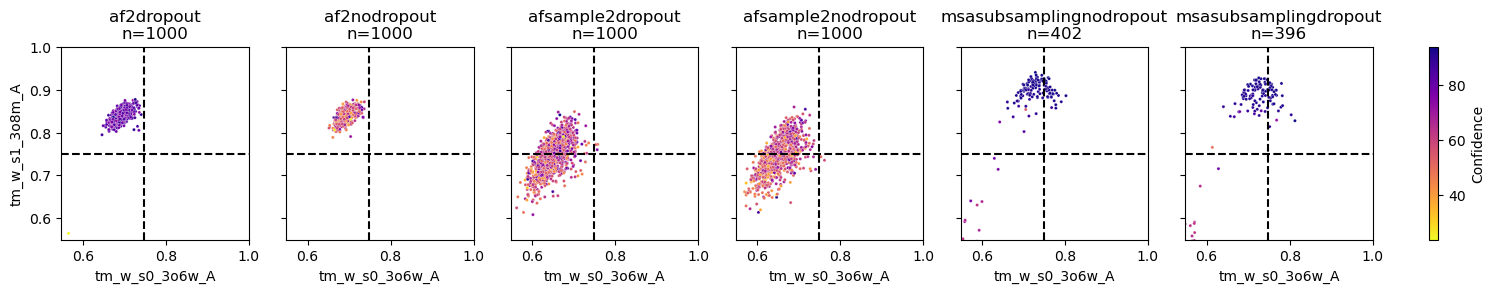

Q9Z4N6


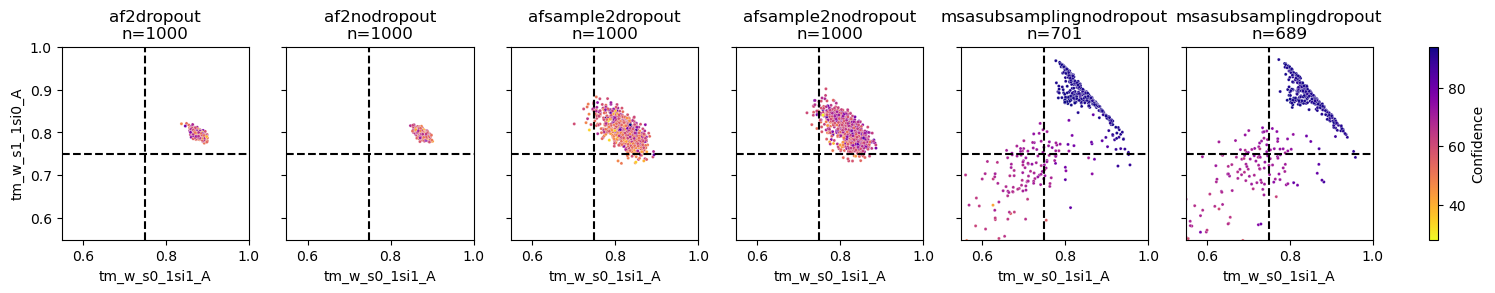

A6UVT1


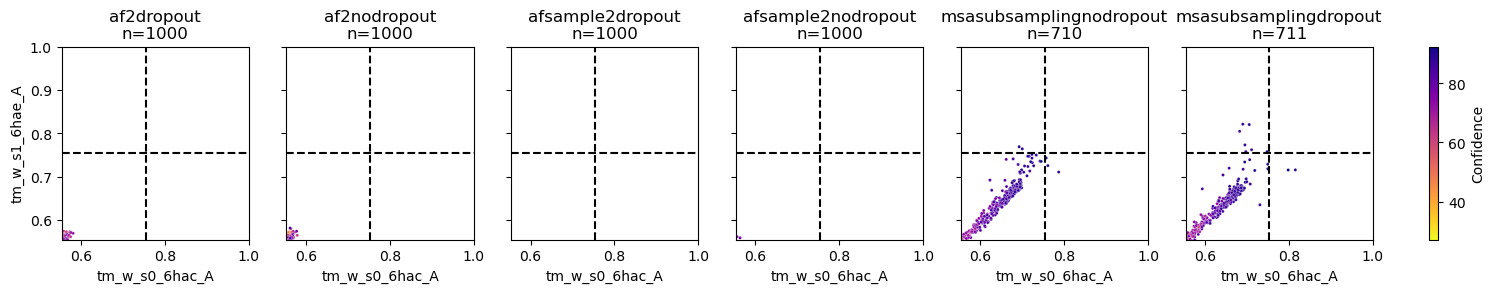

B7IE18


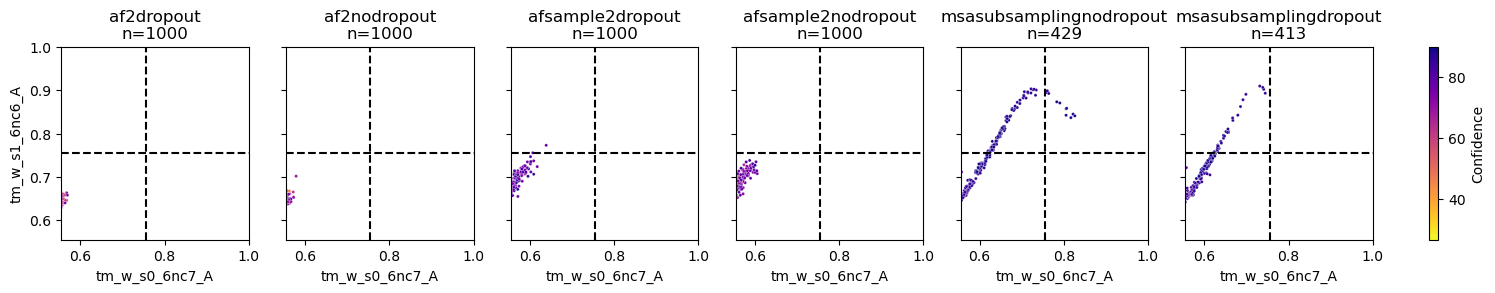

B3EYN2


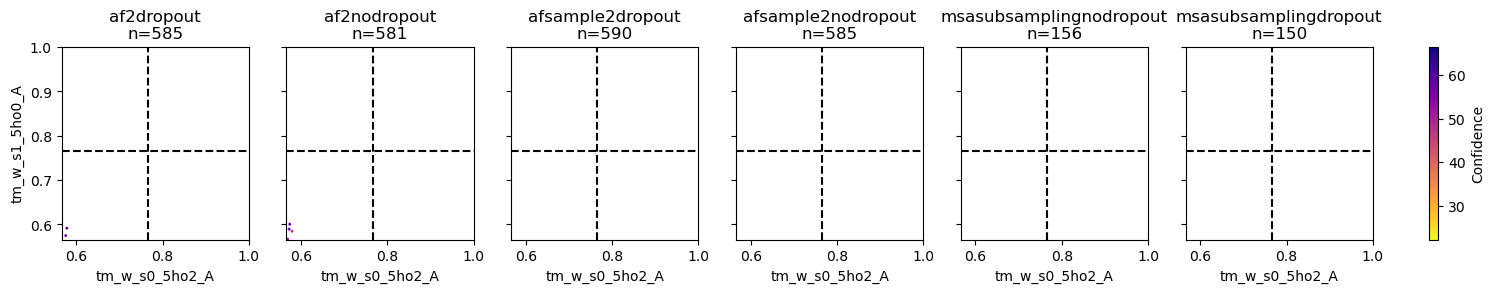

Q53W80


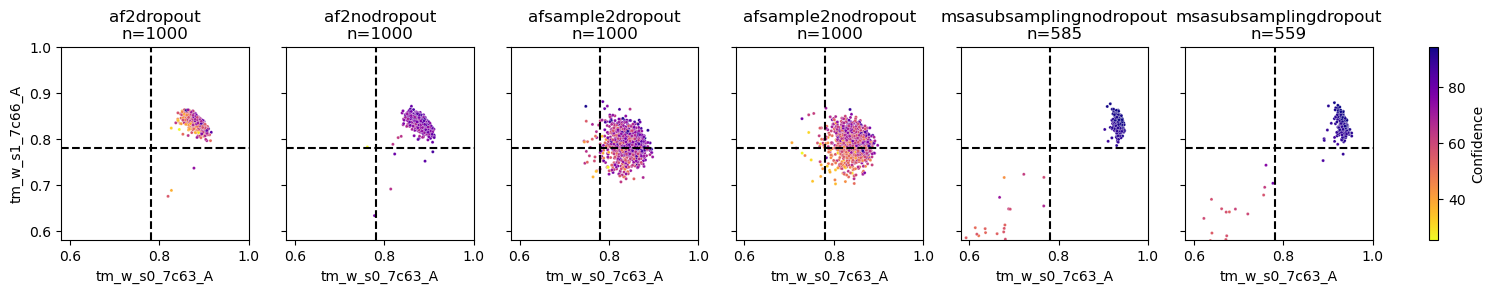

Q9SS90


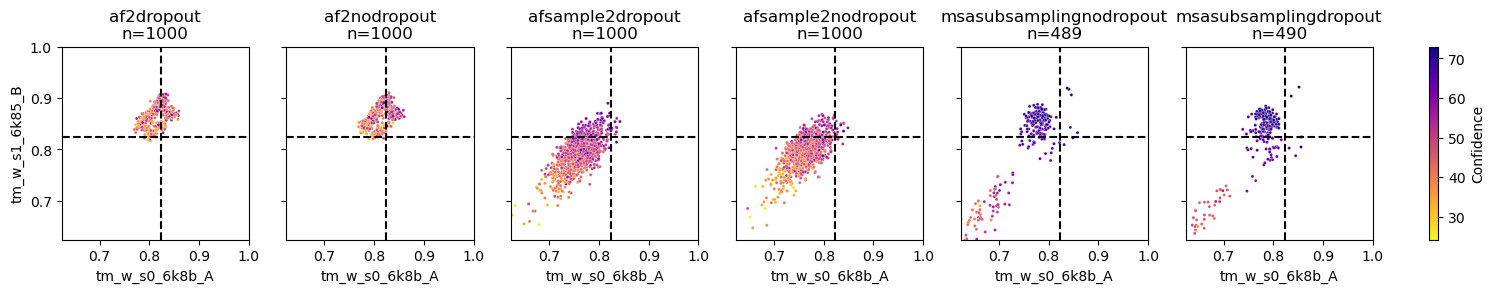

Q9X9P9


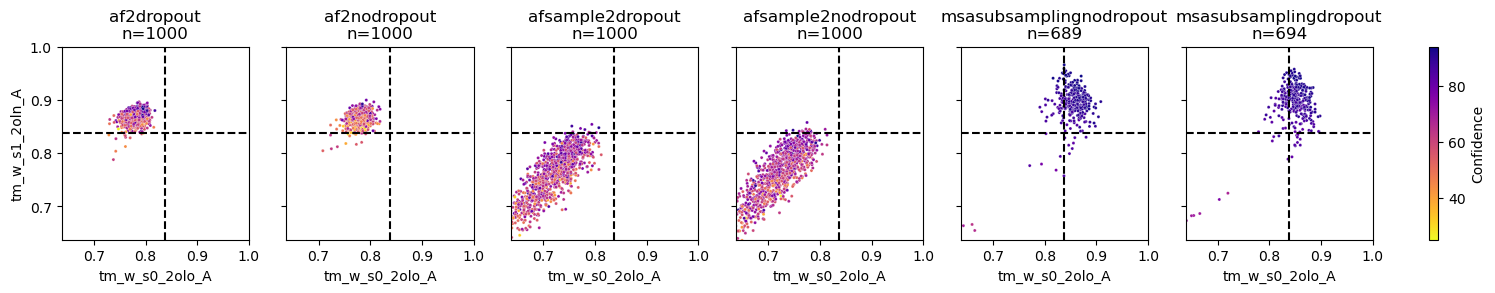

In [6]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os, glob
import pickle

# Load filtered dictionary
with open('../data/input_datasets/oc23/filtered_dict.pickle', 'rb') as handle:
    filtered_dict = pickle.load(handle)

# Initialize object
good_examples = {k: v for k, v in filtered_dict.items() if v and v[3] < 0.85}

outpath = '/proj/wallner-b/users/x_yogka/cfold/ablation/data/results/'
for protein in good_examples.keys():
    print(protein)
    csvs = glob.glob(f'{outpath}/*/*{protein}*')
    stacked_df = []
    for csv in csvs:
        df = pd.read_csv(csv)
        df['method']=df.model.str.split('/', expand=True)[10]
        df['network']=df.model.str.split('_', expand=True)[2]
        stacked_df.append(df)
    stacked_df = pd.concat(stacked_df)
    stacked_df['dropout']=[model.split('_')[-1].split('.')[0] for model in stacked_df.model.values]
    stacked_df['id'] = stacked_df['method']+stacked_df['dropout']

    fig, axes = plt.subplots(1, 6, figsize=(18, 2.5), sharex=True, sharey=True)
    norm = plt.Normalize(stacked_df['confidence'].min(), stacked_df['confidence'].max())
    sm = plt.cm.ScalarMappable(cmap="plasma_r", norm=norm)
    sm.set_array([])  

    for id, ax in zip(stacked_df.id.unique(), axes):
        sc = sns.scatterplot(
            x=stacked_df.columns[4],    
            y=stacked_df.columns[5], 
            data=stacked_df[stacked_df.id == id], 
            ax=ax, 
            hue='confidence', 
            palette='plasma_r', 
            s=5
        )
        ax.set_title(id+f'\nn={len(stacked_df[stacked_df.id == id])}')
        ax.set_xlim([good_examples[protein][3]-0.2, 1])
        ax.set_ylim([good_examples[protein][3]-0.2, 1])
        ax.axvline(x=good_examples[protein][3], ls='--', color='black')
        ax.axhline(y=good_examples[protein][3], ls='--', color='black')
        sc.legend_.remove()

    cbar = fig.colorbar(sm, ax=axes, orientation="vertical", fraction=0.02, pad=0.04)
    cbar.set_label("Confidence")
    plt.show()


sda

In [6]:
## ANALYSE ENSEMBLES
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Load filtered dictionary
with open('../data/input_datasets/oc23/filtered_dict.pickle', 'rb') as handle:
    filtered_dict = pickle.load(handle)

# Initialize object
good_examples = {k: v for k, v in filtered_dict.items() if v and v[3] < 0.85}

refpdbpath = '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs'
datapath = '/proj/wallner-b/users/x_yogka/cfold/ablation/data/'
outpath = '/proj/wallner-b/users/x_yogka/sidekick/airy/data/analysis_out'

for protein in list(good_examples.keys()):
    refpdbs = good_examples[protein][:2]

    pdbpaths = []
    for refpdb in refpdbs:
        pdbpaths.append(f'{refpdbpath}/{refpdb}.pdb')
    pdbpaths_ = ','.join(pdbpaths)

    df_ = []
    for method  in ['msasubsampling']:
        print('---------------------')
        print(protein, method)
        print('---------------------')
        afoutpath = f'{datapath}/afout/{protein}/{method}'
        cmd = (
            f'python /proj/wallner-b/users/x_yogka/sidekick/airy/src/landscape/analyse_ensembles.py '
            f'--method {method} '
            f'--protein {protein} '
            f'--afout_path {afoutpath} '
            f'--outpath {datapath}/results '
            f'--ncpu 32 '
            f'--refstates {pdbpaths_}'
            )        
        #os.system(cmd)
        #print(cmd)
        outcsv = f'{datapath}/results/{method}/final_df_{protein}_{len(pdbpaths)}_states.csv'
        print()
        os.system(cmd)
        if not os.path.exists(outcsv):
            print('FATAL', outcsv)
            break
        df = pd.read_csv(outcsv)
        df['id']=method
        df_.append(df)
    
    df_concat = pd.concat(df_)

---------------------
A2RJ53 msasubsampling
---------------------



2025-03-06 09:07:16,881 [INFO] Got 2 states.
2025-03-06 09:07:16,882 [INFO] Analyzing models...
2025-03-06 09:07:16,890 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A2RJ53/msasubsampling
2025-03-06 09:07:26,209 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  99 156 157 206 207 208 209 210 211 212 213
 214 215 482 483 484 485 486 498 499 580 581 582 583 584 585 586 587 588
 589 590 591 592 593 594 595 596 597 598 599 600]
2025-03-06 09:07:26,223 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A2RJ53/msasubsampling/unrelaxed_cfold_pred_997_c5120_nodropout.pdb, Confidence: 74.69709999999999


0.76074


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3drf_A.pdb - mo
2025-03-06 09:09:53,311 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A2RJ53/msasubsampling
2025-03-06 09:09:53,353 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_A2RJ53_2_states.csv


0.79968
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A2RJ53
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A2RJ53
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A2RJ53
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A2RJ53
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A2RJ53
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A2RJ53
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A2RJ53
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A2RJ53
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A2RJ53
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A2RJ53

[2000 rows x 7 columns]>
---------------------
O76728 msasubsampling
---------------------



2025-03-06 09:09:54,185 [INFO] Got 2 states.
2025-03-06 09:09:54,186 [INFO] Analyzing models...
2025-03-06 09:09:54,193 [INFO] Found 1550 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/O76728/msasubsampling
2025-03-06 09:10:03,399 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  47  48 125 126 128 129 180 181 182 184 273 274 275 276 277 323
 324 367 368 369 370 371 372 373 374 375 393 394 395 396 397 437 525 526
 527 528 529 530 601 602 603 684 714 715]
2025-03-06 09:10:03,402 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/O76728/msasubsampling/unrelaxed_cfold_pred_778_c1024_nodropout.pdb, Confidence: 77.10787412587412
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/O76728/msasubsampling/unrelaxed_cf
2025-03-06 09:11:13,929 [INFO] Received reference PDB

0.69179


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/4bp9_A.pdb - mo
2025-03-06 09:13:49,372 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/O76728/msasubsampling
2025-03-06 09:13:49,395 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_O76728_2_states.csv


0.84045
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   O76728
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   O76728
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   O76728
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   O76728
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   O76728
...                                                 ...  ...      ...
1545  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   O76728
1546  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   O76728
1547  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   O76728
1548  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   O76728
1549  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   O76728

[1550 rows x 7 columns]>
---------------------
P31133 msasubsampling
---------------------



2025-03-06 09:13:50,188 [INFO] Got 2 states.
2025-03-06 09:13:50,189 [INFO] Analyzing models...
2025-03-06 09:13:50,203 [INFO] Found 3800 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/msasubsampling
2025-03-06 09:14:01,254 [INFO] Low confidence (mean plddt<50) residue indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
2025-03-06 09:14:01,259 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/msasubsampling/unrelaxed_model_5_ptm_pred_83_c1024_nodropout.pdb, Confidence: 93.57021621621622
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/msasubsampling/unrelaxed_mo
2025-03-06 09:14:22,001 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6yed_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6ye0_A.pdb']
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_

0.8506


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6ye0_A.pdb - mo
2025-03-06 09:15:05,342 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/msasubsampling
2025-03-06 09:15:05,378 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_P31133_2_states.csv


0.97994
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P31133
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P31133
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P31133
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P31133
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P31133
...                                                 ...  ...      ...
3795  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P31133
3796  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P31133
3797  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P31133
3798  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P31133
3799  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P31133

[3800 rows x 7 columns]>
---------------------
P00558 msasubsampling
---------------------



2025-03-06 09:15:06,313 [INFO] Got 2 states.
2025-03-06 09:15:06,314 [INFO] Analyzing models...
2025-03-06 09:15:06,322 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P00558/msasubsampling
2025-03-06 09:15:13,374 [INFO] Low confidence (mean plddt<50) residue indices: [  1 417]
2025-03-06 09:15:13,376 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P00558/msasubsampling/unrelaxed_cfold_pred_972_c5120_dropout.pdb, Confidence: 85.85892086330936
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P00558/msasubsampling/unrelaxed_cf
2025-03-06 09:15:27,610 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2xe6_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2wzd_A.pdb']
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2xe6_A.pdb - mo


0.8788


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2wzd_A.pdb - mo
2025-03-06 09:16:02,917 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P00558/msasubsampling
2025-03-06 09:16:02,942 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_P00558_2_states.csv


0.71603
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P00558
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P00558
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P00558
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P00558
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P00558
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P00558
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P00558
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P00558
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P00558
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P00558

[2000 rows x 7 columns]>
---------------------
P40131 msasubsampling
---------------------



2025-03-06 09:16:03,679 [INFO] Got 2 states.
2025-03-06 09:16:03,680 [INFO] Analyzing models...
2025-03-06 09:16:03,688 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P40131/msasubsampling
2025-03-06 09:16:07,660 [INFO] Low confidence (mean plddt<50) residue indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 66 67
 68]
2025-03-06 09:16:07,663 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P40131/msasubsampling/unrelaxed_cfold_pred_608_c256_nodropout.pdb, Confidence: 78.62908675799085
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P40131/msasubsampling/unrelaxed_cf
2025-03-06 09:16:12,078 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3tee_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3vjp_A.pdb']
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/

0.62776


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3vjp_A.pdb - mo
2025-03-06 09:16:20,102 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P40131/msasubsampling
2025-03-06 09:16:20,146 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_P40131_2_states.csv


0.86838
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P40131
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P40131
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P40131
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P40131
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P40131
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P40131
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P40131
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P40131
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P40131
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P40131

[2000 rows x 7 columns]>
---------------------
Q7DAU8 msasubsampling
---------------------



2025-03-06 09:16:20,956 [INFO] Got 2 states.
2025-03-06 09:16:21,078 [INFO] Analyzing models...
2025-03-06 09:16:21,087 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q7DAU8/msasubsampling
2025-03-06 09:16:30,220 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  70  71 154
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 376 377 378 379 380 381 382 383 384 385
 402 403 404 405 406 412 413 415 418 421 422 423 424 425 426 427 428 430
 431 432 433 434 435 436 437 438 439 448 450 453 454 458 460 461 462 463
 464 475 477 479 483 484 485 486 487 488 489 490 492 493 495 498 500 501
 502 503 504 505 506 507 508 509 573]
2025-03-06 09:16:30,226 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q7DAU8/msasubsampling/unrelaxed_cfold

0.84137


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3l6h_A.pdb - mo
2025-03-06 09:17:39,315 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q7DAU8/msasubsampling
2025-03-06 09:17:39,343 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_Q7DAU8_2_states.csv


0.85633
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q7DAU8
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q7DAU8
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q7DAU8
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q7DAU8
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q7DAU8
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q7DAU8
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q7DAU8
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q7DAU8
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q7DAU8
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q7DAU8

[2000 rows x 7 columns]>
---------------------
P21589 msasubsampling
---------------------



2025-03-06 09:17:40,289 [INFO] Got 2 states.
2025-03-06 09:17:40,290 [INFO] Analyzing models...
2025-03-06 09:17:40,298 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P21589/msasubsampling
2025-03-06 09:17:49,344 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  47  48  49  54  55 378 550 551 552 553 554 555
 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573
 574]
2025-03-06 09:17:49,347 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P21589/msasubsampling/unrelaxed_cfold_pred_780_c1024_dropout.pdb, Confidence: 77.74905923344949
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P21589/msasubsampling/unrelaxed_cf
2025-03-06 09:18:30,440 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/7qga_A.pdb', '/proj/wallner-b/u

0.61174


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/4h2i_A.pdb - mo
2025-03-06 09:19:52,504 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P21589/msasubsampling
2025-03-06 09:19:52,530 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_P21589_2_states.csv


0.75815
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P21589
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P21589
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P21589
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P21589
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P21589
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P21589
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P21589
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P21589
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P21589
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P21589

[2000 rows x 7 columns]>
---------------------
A0QTT2 msasubsampling
---------------------



2025-03-06 09:19:53,300 [INFO] Got 2 states.
2025-03-06 09:19:53,302 [INFO] Analyzing models...
2025-03-06 09:19:53,310 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A0QTT2/msasubsampling
2025-03-06 09:20:00,724 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6 436 437 438 439]
2025-03-06 09:20:00,727 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A0QTT2/msasubsampling/unrelaxed_cfold_pred_794_c1024_dropout.pdb, Confidence: 81.72981776765376
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A0QTT2/msasubsampling/unrelaxed_cf
2025-03-06 09:20:20,209 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/7cy2_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/7cyr_A.pdb']
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/7cy2_A.pdb - mo


0.75269


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/7cyr_A.pdb - mo
2025-03-06 09:20:51,327 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A0QTT2/msasubsampling
2025-03-06 09:20:51,351 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_A0QTT2_2_states.csv


0.74944
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A0QTT2
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A0QTT2
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A0QTT2
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A0QTT2
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A0QTT2
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A0QTT2
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A0QTT2
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A0QTT2
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A0QTT2
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A0QTT2

[2000 rows x 7 columns]>
---------------------
Q5F9M1 msasubsampling
---------------------



2025-03-06 09:20:52,122 [INFO] Got 2 states.
2025-03-06 09:20:52,124 [INFO] Analyzing models...
2025-03-06 09:20:52,132 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q5F9M1/msasubsampling
2025-03-06 09:20:56,557 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37 274]
2025-03-06 09:20:56,559 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q5F9M1/msasubsampling/unrelaxed_cfold_pred_852_c1024_dropout.pdb, Confidence: 79.85091240875913
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q5F9M1/msasubsampling/unrelaxed_cf
2025-03-06 09:21:02,733 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3zsf_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2yln_A.pdb'

0.80235


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2yln_A.pdb - mo
2025-03-06 09:21:15,835 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q5F9M1/msasubsampling
2025-03-06 09:21:15,860 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_Q5F9M1_2_states.csv


0.86857
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q5F9M1
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q5F9M1
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q5F9M1
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q5F9M1
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q5F9M1
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q5F9M1
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q5F9M1
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q5F9M1
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q5F9M1
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q5F9M1

[2000 rows x 7 columns]>
---------------------
Q9X6R4 msasubsampling
---------------------



2025-03-06 09:21:16,824 [INFO] Got 2 states.
2025-03-06 09:21:16,826 [INFO] Analyzing models...
2025-03-06 09:21:16,832 [INFO] Found 1628 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9X6R4/msasubsampling
2025-03-06 09:21:25,929 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5 194 195 196 197 198 199 200 201 202 203 253 689 690]
2025-03-06 09:21:25,933 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9X6R4/msasubsampling/unrelaxed_cfold_pred_782_c1024_nodropout.pdb, Confidence: 81.06630434782609
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9X6R4/msasubsampling/unrelaxed_cf
2025-03-06 09:22:29,508 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3iuj_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3iuq_A.pdb']
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc2

0.73307


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3iuq_A.pdb - mo
2025-03-06 09:24:39,585 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9X6R4/msasubsampling
2025-03-06 09:24:39,608 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_Q9X6R4_2_states.csv


0.88079
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X6R4
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X6R4
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X6R4
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X6R4
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X6R4
...                                                 ...  ...      ...
1623  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X6R4
1624  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X6R4
1625  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X6R4
1626  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X6R4
1627  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X6R4

[1628 rows x 7 columns]>
---------------------
Q18A65 msasubsampling
---------------------



2025-03-06 09:24:40,390 [INFO] Got 2 states.
2025-03-06 09:24:40,391 [INFO] Analyzing models...
2025-03-06 09:24:40,399 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q18A65/msasubsampling
2025-03-06 09:24:46,279 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41 330 336 337 338 339 340]
2025-03-06 09:24:46,282 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q18A65/msasubsampling/unrelaxed_cfold_pred_682_c512_dropout.pdb, Confidence: 80.79035294117648
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q18A65/msasubsampling/unrelaxed_cf
2025-03-06 09:24:55,875 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6hnj_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/i

0.70774


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6hni_A.pdb - mo
2025-03-06 09:25:13,594 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q18A65/msasubsampling
2025-03-06 09:25:13,648 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_Q18A65_2_states.csv


0.9326
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q18A65
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q18A65
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q18A65
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q18A65
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q18A65
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q18A65
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q18A65
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q18A65
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q18A65
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q18A65

[2000 rows x 7 columns]>
---------------------
Q9ERE7 msasubsampling
---------------------



2025-03-06 09:25:14,470 [INFO] Got 2 states.
2025-03-06 09:25:14,471 [INFO] Analyzing models...
2025-03-06 09:25:14,479 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9ERE7/msasubsampling
2025-03-06 09:25:18,566 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  57  61  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224]
2025-03-06 09:25:18,569 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9ERE7/msasubsampling/unrelaxed_cfold_pred_815_c1024_dropout.pdb, Confidence: 62.183125000000004
TM-align (/proj/wallner-b

0.52949


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2rqk_A.pdb - mo
2025-03-06 09:25:27,909 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9ERE7/msasubsampling
2025-03-06 09:25:27,937 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_Q9ERE7_2_states.csv


0.7521
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9ERE7
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9ERE7
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9ERE7
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9ERE7
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9ERE7
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9ERE7
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9ERE7
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9ERE7
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9ERE7
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9ERE7

[2000 rows x 7 columns]>
---------------------
P62495 msasubsampling
---------------------



2025-03-06 09:25:28,914 [INFO] Got 2 states.
2025-03-06 09:25:28,916 [INFO] Analyzing models...
2025-03-06 09:25:28,924 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P62495/msasubsampling
2025-03-06 09:25:36,579 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4 180 181 182 183 184 185 422 423 424 425 426 427 428 429
 430 431 432 433 434 435 436 437]
2025-03-06 09:25:36,582 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P62495/msasubsampling/unrelaxed_cfold_pred_858_c1024_dropout.pdb, Confidence: 81.18432494279175
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P62495/msasubsampling/unrelaxed_cf
2025-03-06 09:25:55,182 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2ktv_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2ktu_A.pdb']
TM-align (/proj/wallner-b/users/x_yogka/cfold/a

0.77649


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2ktu_A.pdb - mo
2025-03-06 09:26:05,044 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P62495/msasubsampling
2025-03-06 09:26:05,070 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_P62495_2_states.csv


0.66776
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P62495
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P62495
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P62495
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P62495
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P62495
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P62495
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P62495
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P62495
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P62495
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P62495

[2000 rows x 7 columns]>
---------------------
A0A075Q0W3 msasubsampling
---------------------



2025-03-06 09:26:05,892 [INFO] Got 2 states.
2025-03-06 09:26:05,893 [INFO] Analyzing models...
2025-03-06 09:26:05,900 [INFO] Found 1666 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A0A075Q0W3/msasubsampling
2025-03-06 09:26:15,135 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 159 160 161 162 202
 203 232 247 294 324 453 454 455 4

0.69658


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6mkj_A.pdb - mo
2025-03-06 09:29:27,973 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A0A075Q0W3/msasubsampling
2025-03-06 09:29:28,001 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_A0A075Q0W3_2_states.csv


0.67434
<bound method NDFrame.head of                                                   model  ...     protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...  A0A075Q0W3
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...  A0A075Q0W3
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...  A0A075Q0W3
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...  A0A075Q0W3
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...  A0A075Q0W3
...                                                 ...  ...         ...
1661  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...  A0A075Q0W3
1662  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...  A0A075Q0W3
1663  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...  A0A075Q0W3
1664  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...  A0A075Q0W3
1665  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...  A0A075Q0W3

[1666 rows x 7 columns]>
---------------------
P71447 msasubsampling
----------------

2025-03-06 09:29:28,795 [INFO] Got 2 states.
2025-03-06 09:29:28,796 [INFO] Analyzing models...
2025-03-06 09:29:28,804 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P71447/msasubsampling
2025-03-06 09:29:32,810 [INFO] Low confidence (mean plddt<50) residue indices: []
2025-03-06 09:29:32,813 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P71447/msasubsampling/unrelaxed_cfold_pred_572_c256_nodropout.pdb, Confidence: 88.3047963800905
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P71447/msasubsampling/unrelaxed_cf
2025-03-06 09:29:36,660 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2wfa_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2wf5_A.pdb']
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2wfa_A.pdb - mo


0.90372


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2wf5_A.pdb - mo
2025-03-06 09:29:45,417 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P71447/msasubsampling
2025-03-06 09:29:45,442 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_P71447_2_states.csv


0.96043
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P71447
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P71447
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P71447
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P71447
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P71447
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P71447
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P71447
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P71447
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P71447
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P71447

[2000 rows x 7 columns]>
---------------------
P33284 msasubsampling
---------------------



2025-03-06 09:29:46,405 [INFO] Got 2 states.
2025-03-06 09:29:46,406 [INFO] Analyzing models...
2025-03-06 09:29:46,414 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P33284/msasubsampling
2025-03-06 09:29:54,600 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 481 482 483
 484 485]
2025-03-06 09:29:54,603 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P33284/msasubsampling/unrelaxed_cfold_pred_876_c5120_nodropout.pdb, Confidence: 83.78086597938145
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P33284/msasubsampling/unrelaxed_cf
2025-03-06 09:30:18,813 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3o6w_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3o8m_A.pdb']
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_dat

0.82346


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/3o8m_A.pdb - mo
2025-03-06 09:31:11,328 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P33284/msasubsampling
2025-03-06 09:31:11,354 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_P33284_2_states.csv


0.87377
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P33284
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P33284
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P33284
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P33284
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P33284
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P33284
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P33284
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P33284
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P33284
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   P33284

[2000 rows x 7 columns]>
---------------------
Q9Z4N6 msasubsampling
---------------------



2025-03-06 09:31:12,190 [INFO] Got 2 states.
2025-03-06 09:31:12,191 [INFO] Analyzing models...
2025-03-06 09:31:12,199 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9Z4N6/msasubsampling
2025-03-06 09:31:18,178 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22 338 339 340 341 342]
2025-03-06 09:31:18,181 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9Z4N6/msasubsampling/unrelaxed_cfold_pred_823_c1024_dropout.pdb, Confidence: 83.40146198830409
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9Z4N6/msasubsampling/unrelaxed_cf
2025-03-06 09:31:27,600 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/1si1_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/1si0_A.pdb']
TM-align (/proj/wallner-b/users/x_yogka/cfo

0.90189


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/1si0_A.pdb - mo
2025-03-06 09:31:44,708 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9Z4N6/msasubsampling
2025-03-06 09:31:44,733 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_Q9Z4N6_2_states.csv


0.86419
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9Z4N6
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9Z4N6
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9Z4N6
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9Z4N6
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9Z4N6
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9Z4N6
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9Z4N6
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9Z4N6
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9Z4N6
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9Z4N6

[2000 rows x 7 columns]>
---------------------
A6UVT1 msasubsampling
---------------------



2025-03-06 09:31:45,477 [INFO] Got 2 states.
2025-03-06 09:31:45,478 [INFO] Analyzing models...
2025-03-06 09:31:45,486 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A6UVT1/msasubsampling
2025-03-06 09:31:51,479 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  88  91  93  97 100 104 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 150 151 152
 203 204 205 206 207 208 209 210 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342]
2025-03-06 09:31:51,482 [INFO] Most confident mod

0.58993


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6hae_A.pdb - mo
2025-03-06 09:32:26,516 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A6UVT1/msasubsampling
2025-03-06 09:32:26,541 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_A6UVT1_2_states.csv


0.58118
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A6UVT1
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A6UVT1
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A6UVT1
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A6UVT1
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A6UVT1
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A6UVT1
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A6UVT1
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A6UVT1
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A6UVT1
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   A6UVT1

[2000 rows x 7 columns]>
---------------------
B7IE18 msasubsampling
---------------------



2025-03-06 09:32:27,535 [INFO] Got 2 states.
2025-03-06 09:32:27,536 [INFO] Analyzing models...
2025-03-06 09:32:27,544 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/B7IE18/msasubsampling
2025-03-06 09:32:35,722 [INFO] Low confidence (mean plddt<50) residue indices: [  1 437 438 462 463 466 467 469 470 471 472 473 474 475]
2025-03-06 09:32:35,725 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/B7IE18/msasubsampling/unrelaxed_cfold_pred_912_c5120_dropout.pdb, Confidence: 81.58385263157894
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/B7IE18/msasubsampling/unrelaxed_cf
2025-03-06 09:32:58,636 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6nc7_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6nc6_A.pdb']
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6nc7_A.pdb 

0.56097


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6nc6_A.pdb - mo
2025-03-06 09:34:02,397 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/B7IE18/msasubsampling
2025-03-06 09:34:02,423 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_B7IE18_2_states.csv


0.69397
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B7IE18
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B7IE18
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B7IE18
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B7IE18
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B7IE18
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B7IE18
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B7IE18
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B7IE18
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B7IE18
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B7IE18

[2000 rows x 7 columns]>
---------------------
B3EYN2 msasubsampling
---------------------



2025-03-06 09:34:03,186 [INFO] Got 2 states.
2025-03-06 09:34:03,187 [INFO] Analyzing models...
2025-03-06 09:34:03,193 [INFO] Found 1359 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/B3EYN2/msasubsampling
2025-03-06 09:34:12,616 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 133 134 135 136 137 138 139 140 141 142 143 144 145 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 1

0.53366


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/5ho0_A.pdb - mo
2025-03-06 09:39:19,094 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/B3EYN2/msasubsampling
2025-03-06 09:39:19,122 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_B3EYN2_2_states.csv


0.53815
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B3EYN2
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B3EYN2
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B3EYN2
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B3EYN2
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B3EYN2
...                                                 ...  ...      ...
1354  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B3EYN2
1355  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B3EYN2
1356  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B3EYN2
1357  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B3EYN2
1358  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   B3EYN2

[1359 rows x 7 columns]>
---------------------
Q53W80 msasubsampling
---------------------



2025-03-06 09:39:19,918 [INFO] Got 2 states.
2025-03-06 09:39:19,932 [INFO] Analyzing models...
2025-03-06 09:39:19,940 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q53W80/msasubsampling
2025-03-06 09:39:27,486 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19 283 284 285 286 287 288 289 290 291]
2025-03-06 09:39:27,489 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q53W80/msasubsampling/unrelaxed_cfold_pred_725_c512_dropout.pdb, Confidence: 82.53725806451612
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q53W80/msasubsampling/unrelaxed_cf
2025-03-06 09:39:45,176 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/7c63_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/7c66_A.pdb']
TM-align (/proj/wallner-b/users/x_yogka/

0.91587


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/7c66_A.pdb - mo
2025-03-06 09:40:19,044 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q53W80/msasubsampling
2025-03-06 09:40:19,073 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_Q53W80_2_states.csv


0.87885
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q53W80
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q53W80
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q53W80
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q53W80
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q53W80
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q53W80
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q53W80
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q53W80
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q53W80
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q53W80

[2000 rows x 7 columns]>
---------------------
Q9SS90 msasubsampling
---------------------



2025-03-06 09:40:20,008 [INFO] Got 2 states.
2025-03-06 09:40:20,025 [INFO] Analyzing models...
2025-03-06 09:40:20,033 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9SS90/msasubsampling
2025-03-06 09:40:28,298 [INFO] Low confidence (mean plddt<50) residue indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 222 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422
 423 424 425 426 427 428 429 430 431 4

0.85094


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/6k85_B.pdb - mo
2025-03-06 09:41:13,879 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9SS90/msasubsampling
2025-03-06 09:41:13,910 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_Q9SS90_2_states.csv


0.90825
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9SS90
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9SS90
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9SS90
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9SS90
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9SS90
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9SS90
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9SS90
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9SS90
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9SS90
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9SS90

[2000 rows x 7 columns]>
---------------------
Q9X9P9 msasubsampling
---------------------



2025-03-06 09:41:14,690 [INFO] Got 2 states.
2025-03-06 09:41:14,709 [INFO] Analyzing models...
2025-03-06 09:41:14,717 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9X9P9/msasubsampling
2025-03-06 09:41:21,511 [INFO] Low confidence (mean plddt<50) residue indices: [ 43  44  98  99 100 101 102 237 238 239 240 248 249 250 251 252 253 254
 255 264 265 266 267 329 339 340 341 342 343 344 345 385 386 387 388 389]
2025-03-06 09:41:21,514 [INFO] Most confident model: /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9X9P9/msasubsampling/unrelaxed_cfold_pred_878_c5120_nodropout.pdb, Confidence: 79.86601542416453
TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9X9P9/msasubsampling/unrelaxed_cf
2025-03-06 09:41:34,559 [INFO] Received reference PDBs: ['/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2olo_A.pdb', '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2oln_A.pdb']
TM-al

0.81451
0.89798
<bound method NDFrame.head of                                                   model  ...  protein
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X9P9
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X9P9
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X9P9
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X9P9
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X9P9
...                                                 ...  ...      ...
1995  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X9P9
1996  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X9P9
1997  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X9P9
1998  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X9P9
1999  /proj/wallner-b/users/x_yogka/cfold/ablation/d...  ...   Q9X9P9

[2000 rows x 7 columns]>


TM-align (/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs/2oln_A.pdb - mo
2025-03-06 09:42:03,889 [INFO] Alignments done. TM-align outputs saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/Q9X9P9/msasubsampling
2025-03-06 09:42:03,916 [INFO] >> Results CSV saved at /proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_Q9X9P9_2_states.csv


sd

In [ ]:
# Analyse models
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Load filtered dictionary
with open('../data/input_datasets/oc23/filtered_dict.pickle', 'rb') as handle:
    filtered_dict = pickle.load(handle)

# Initialize object
good_examples = {k: v for k, v in filtered_dict.items() if v and v[3] < 0.85}

refpdbpath = '/proj/wallner-b/users/x_yogka/cfold/ablation/data/input_datasets/oc23/pdbs'
datapath = '/proj/wallner-b/users/x_yogka/cfold/ablation/data/'
outpath = '/proj/wallner-b/users/x_yogka/sidekick/airy/data/analysis_out'

for protein in list(good_examples.keys()):
    refpdbs = good_examples[protein][:2]

    pdbpaths = []
    for refpdb in refpdbs:
        pdbpaths.append(f'{refpdbpath}/{refpdb}.pdb')
    pdbpaths_ = ','.join(pdbpaths)

    df_ = []
    for method  in ['msasubsampling', 'af2', 'afsample2']:
        print('---------------------')
        print(protein, method)
        print('---------------------')
        afoutpath = f'{datapath}/afout/{protein}/{method}'
        cmd = (
            f'python /proj/wallner-b/users/x_yogka/sidekick/airy/src/landscape/analyse_ensembles.py '
            f'--method {method} '
            f'--protein {protein} '
            f'--afout_path {afoutpath} '
            f'--outpath {datapath}/results '
            f'--ncpu 64 '
            f'--refstates {pdbpaths_}'
            )        
        #os.system(cmd)
        #print(cmd)
        outcsv = f'{datapath}/results/{method}/final_df_{protein}_{len(pdbpaths)}_states.csv'
        print()
        os.system(cmd)
        if not os.path.exists(outcsv):
            print('FATAL', outcsv)
            break
        df = pd.read_csv(outcsv)
        df['id']=method
        df_.append(df)
    
    df_concat = pd.concat(df_)


---------------------
A2RJ53 msasubsampling
---------------------



2025-03-05 11:36:23,185 [INFO] Got 2 states.
2025-03-05 11:36:23,187 [INFO] Analyzing models...
2025-03-05 11:36:23,188 [INFO] Found 0 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A2RJ53/msasubsampling
2025-03-05 11:36:23,521 [ERROR] Analysis failed: axis 1 is out of bounds for array of dimension 1


---------------------
A2RJ53 af2
---------------------



2025-03-05 11:36:24,766 [INFO] Got 2 states.
2025-03-05 11:36:24,768 [INFO] Analyzing models...
2025-03-05 11:36:24,778 [INFO] Found 2000 models in /proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/A2RJ53/af2
Process ForkPoolWorker-109:
Process ForkPoolWorker-116:
Process ForkPoolWorker-101:
Process ForkPoolWorker-91:
Process ForkPoolWorker-86:
Process ForkPoolWorker-107:
Process ForkPoolWorker-111:
Process ForkPoolWorker-64:
Process ForkPoolWorker-123:
Process ForkPoolWorker-100:
Process ForkPoolWorker-45:
Process ForkPoolWorker-127:
Process ForkPoolWorker-96:
Process ForkPoolWorker-35:
Process ForkPoolWorker-122:
Process ForkPoolWorker-58:
Process ForkPoolWorker-126:
Process ForkPoolWorker-57:
Process ForkPoolWorker-69:
Process ForkPoolWorker-12:
Process ForkPoolWorker-84:
Process ForkPoolWorker-27:
Process ForkPoolWorker-60:
Process ForkPoolWorker-48:
Process ForkPoolWorker-56:
Process ForkPoolWorker-8:
Process ForkPoolWorker-118:
Process ForkPoolWorker-47:
Process ForkPoolWor

In [30]:
# GET TRAIN TEST CONF FROM CFOLD DATA
cfold_train_pdbs_ = os.listdir('/proj/wallner-b/users/x_yogka/cfold/ablation/data/cfold_data/native_structures_with_train_confs')
cfold_train_pdbs = [train_pdb.split('_')[0][:-1] for train_pdb in cfold_train_pdbs_]
cfold_test_pdbs_ = os.listdir('/proj/wallner-b/users/x_yogka/cfold/ablation/data/cfold_data/native_structures_with_test_confs')
cfold_test_pdbs = [test_pdb.split('_')[0][:-1] for test_pdb in cfold_test_pdbs_]

cfold_train_pdbs

['2QD',
 '5HA',
 '5TZ',
 '2H2',
 '5M6',
 '6VG',
 '6NC',
 '4LA',
 '6YE',
 '1EE',
 '2DR',
 '6E8',
 '3TG',
 '1FN',
 '6B7',
 '3BI',
 '7T4',
 '1XO',
 '7TB',
 '4TV',
 '7PA',
 '2RI',
 '3L3',
 '5LE',
 '3AQ',
 '4KQ',
 '6GO',
 '7ZU',
 '7SY',
 '7LZ',
 '2AO',
 '4QI',
 '3K6',
 '5MS',
 '1T3',
 '6HA',
 '3VK',
 '2ZG',
 '3AX',
 '4RL',
 '5FT',
 '7CM',
 '2NR',
 '4X8',
 '3Q5',
 '5ZJ',
 '3II',
 '5E8',
 '6MF',
 '5C5',
 '4B3',
 '1N0',
 '1XD',
 '3FV',
 '2BK',
 '2FH',
 '6CR',
 '5E6',
 '3WT',
 '1ZA',
 '6XO',
 '3FL',
 '6ZJ',
 '7XN',
 '3PI',
 '1TA',
 '7UY',
 '5CR',
 '3O7',
 '2X2',
 '5U0',
 '6FP',
 '4N3',
 '2C7',
 '3WB',
 '3RO',
 '2I4',
 '3DK',
 '3ZY',
 '6EF',
 '6HA',
 '6JA',
 '6M3',
 '8A5',
 '6E9',
 '3ZS',
 '6UH',
 '7DE',
 '2B3',
 '3OO',
 '7N7',
 '6XL',
 '6KR',
 '6HB',
 '5TZ',
 '3AS',
 '3KH',
 '6KW',
 '3U0',
 '2RA',
 'fetc',
 '6HK',
 '5YX',
 '4P0',
 '3US',
 '6FP',
 '7JG',
 '6IR',
 '4EL',
 '5KE',
 '4NC',
 '2HF',
 '7EL',
 '2LA',
 '2BB',
 '3U2',
 '5YW',
 '6XV',
 '5O2',
 '6O1',
 '6PS',
 '5TZ',
 '3L1',
 '1DT',
 '4ON',

In [31]:
for protein in good_examples.keys():
    open_, closed_, *_ = good_examples[protein]
    open_ = open_.split('_')[0].upper()[:-1]
    closed_ = closed_.split('_')[0].upper()[:-1]
    d = {}
    if open_ in cfold_train_pdbs:
        d['open'] = 'train'
    elif open_ in cfold_test_pdbs:
        d['open'] = 'test'
    else:
        d['open'] = None

    if closed_ in cfold_test_pdbs:
        d['closed'] = 'test'
    elif closed_ in cfold_train_pdbs:
        d['closed'] = 'train'
    else:
        d['closed'] = None
    print(d, protein)


{'open': None, 'closed': None} A2RJ53
{'open': None, 'closed': None} O76728
{'open': 'train', 'closed': 'test'} P31133
{'open': None, 'closed': None} P00558
{'open': 'test', 'closed': None} P40131
{'open': 'train', 'closed': 'test'} Q7DAU8
{'open': None, 'closed': None} P21589
{'open': None, 'closed': None} A0QTT2
{'open': 'train', 'closed': 'test'} Q5F9M1
{'open': 'train', 'closed': 'train'} Q9X6R4
{'open': 'train', 'closed': 'test'} Q18A65
{'open': None, 'closed': None} Q9ERE7
{'open': None, 'closed': None} P62495
{'open': None, 'closed': None} A0A075Q0W3
{'open': None, 'closed': None} P71447
{'open': None, 'closed': None} P33284
{'open': None, 'closed': None} Q9Z4N6
{'open': 'train', 'closed': 'train'} A6UVT1
{'open': 'train', 'closed': 'test'} B7IE18
{'open': None, 'closed': None} B3EYN2
{'open': None, 'closed': None} Q53W80
{'open': None, 'closed': None} Q9SS90
{'open': 'test', 'closed': 'test'} Q9X9P9


In [23]:
d

{'A2RJ53': [],
 'O76728': [],
 'P31133': [],
 'P00558': [],
 'P40131': [],
 'Q7DAU8': [],
 'P21589': [],
 'A0QTT2': [],
 'Q5F9M1': [],
 'Q9X6R4': [],
 'Q18A65': [],
 'Q9ERE7': [],
 'P62495': [],
 'A0A075Q0W3': [],
 'P71447': [],
 'P33284': [],
 'Q9Z4N6': [],
 'A6UVT1': [],
 'B7IE18': [],
 'B3EYN2': [],
 'Q53W80': [],
 'Q9SS90': [],
 'Q9X9P9': []}

In [ ]:
for protein in good_examples.keys():
    print(protein, d)


A2RJ53 {'3FTO': None, '3DRF': None}
O76728 {'4BP8': None, '4BP9': None}
P31133 {'6YED': 'train', '6YE0': None}
P00558 {'2XE6': None, '2WZD': None}
P40131 {'3TEE': 'test', '3VJP': None}
Q7DAU8 {'3L6G': 'test', '3L6H': 'train'}
P21589 {'7QGA': None, '4H2I': None}
A0QTT2 {'7CY2': None, '7CYR': None}
Q5F9M1 {'3ZSF': 'train', '2YLN': 'test'}
Q9X6R4 {'3IUJ': None, '3IUQ': None}
Q18A65 {'6HNJ': None, '6HNI': 'train'}
Q9ERE7 {'2RQM': None, '2RQK': None}
P62495 {'2KTV': None, '2KTU': None}
A0A075Q0W3 {'6MKA': None, '6MKJ': None}
P71447 {'2WFA': None, '2WF5': None}
P33284 {'3O6W': None, '3O8M': None}
Q9Z4N6 {'1SI1': None, '1SI0': None}
A6UVT1 {'6HAC': None, '6HAE': None}
B7IE18 {'6NC7': 'train', '6NC6': None}
B3EYN2 {'5HO2': None, '5HO0': None}
Q53W80 {'7C63': None, '7C66': None}
Q9SS90 {'6K8B': None, '6K85': None}
Q9X9P9 {'2OLO': None, '2OLN': None}


P31133


/tmp/ipykernel_3194947/536581720.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


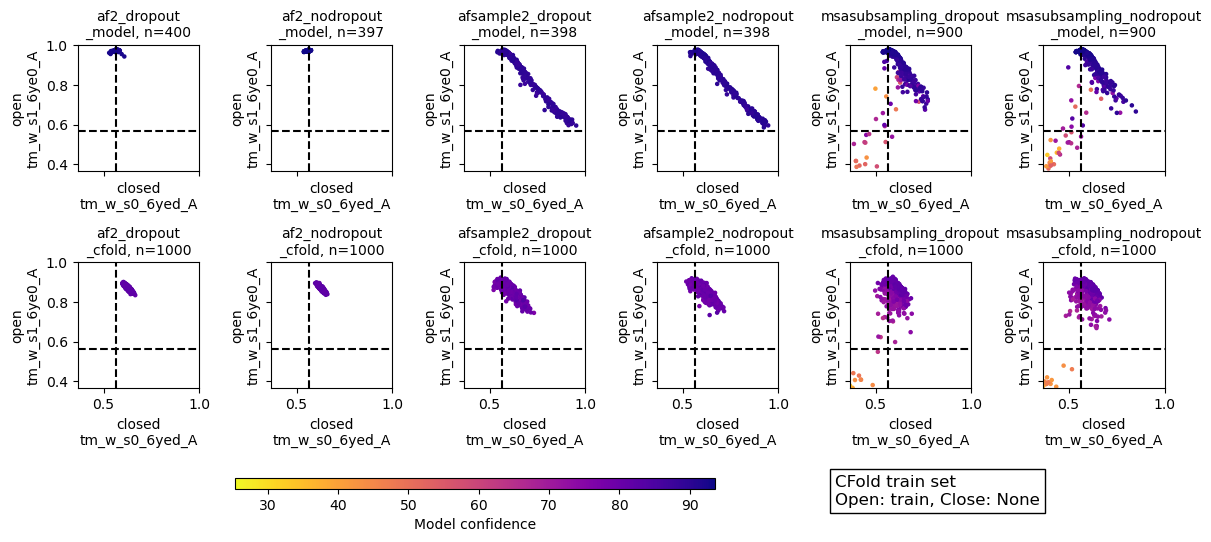

In [ ]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os, glob
import pickle
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Load filtered dictionary
with open('../data/input_datasets/oc23/filtered_dict.pickle', 'rb') as handle:
    filtered_dict = pickle.load(handle)

# Initialize object
good_examples = {k: v for k, v in filtered_dict.items() if v and v[3] < 0.85}

outpath = '/proj/wallner-b/users/x_yogka/cfold/ablation/data/results/'
for protein in good_examples.keys():
    protein='P31133'

    open_, closed_, *_ = good_examples[protein]
    open_ = open_.split('_')[0].upper()[:-1]
    closed_ = closed_.split('_')[0].upper()[:-1]
    d = {}
    if open_ in cfold_train_pdbs:
        d['open'] = 'train'
    elif open_ in cfold_test_pdbs:
        d['open'] = 'test'
    else:
        d['open'] = None

    if closed_ in cfold_test_pdbs:
        d['closed'] = 'test'
    elif closed_ in cfold_train_pdbs:
        d['closed'] = 'train'
    else:
        d['closed'] = None
    print(d)

    print(protein)
    csvs = glob.glob(f'{outpath}/*/*{protein}*')
    stacked_df = []
    for csv in csvs:
        df = pd.read_csv(csv)
        df['method']=df.model.str.split('/', expand=True)[10]
        df['network']=[model.split('unrelaxed')[-1].split('_')[1] for model in df.model]
        stacked_df.append(df)
    stacked_df = pd.concat(stacked_df)
    stacked_df['dropout']=[model.split('_')[-1].split('.')[0] for model in stacked_df.model.values]
    stacked_df['id'] = stacked_df['method']+'_'+stacked_df['dropout']+'_'+stacked_df['network']

    fig, axes = plt.subplots(2, 6, figsize=(12, 5.2), sharex=True, sharey=True)

    norm = plt.Normalize(stacked_df['confidence'].min(), stacked_df['confidence'].max())
    sm = plt.cm.ScalarMappable(cmap="plasma_r", norm=norm)
    sm.set_array([])  

    l1, l2 = [], []
    for a in stacked_df.id.unique():
        if 'model' in a:
            l1.append(a)
        if 'cfold' in a:
            l2.append(a)

    l = sorted(l1)+sorted(l2)

    for id, ax in zip(l, axes.flatten()):
        # sc = ax.scatterplot(
        #     x=stacked_df.columns[4],    
        #     y=stacked_df.columns[5], 
        #     data=stacked_df[stacked_df.id == id], 
        #     ax=ax, 
        #     hue='confidence', 
        #     palette='plasma_r', 
        #     s=10,
        #     hue_norm=norm
        # )
        stacked_df_ = stacked_df[stacked_df.id == id]
        sc = ax.scatter(stacked_df_[stacked_df_.columns[4]], stacked_df_[stacked_df_.columns[5]], s=5, c=stacked_df_['confidence'], cmap='plasma_r', norm=norm)
        ax.set_xlabel('closed\n'+stacked_df_.columns[4])
        ax.set_ylabel('open\n'+stacked_df_.columns[5])
        ax.set_title('_'.join(id.split('_')[:2])+'\n'+id.split('dropout')[1]+f', n={len(stacked_df_[stacked_df_.id == id])}', fontsize=10)
        ax.set_xlim([good_examples[protein][3]-0.2, 1])
        ax.set_ylim([good_examples[protein][3]-0.2, 1])
        ax.axvline(x=good_examples[protein][3], ls='--', color='black')
        ax.axhline(y=good_examples[protein][3], ls='--', color='black')
        #sc.legend_.remove()

    # Create a new axis for the colorbar below the entire plot
    cbar_ax = fig.add_axes([0.2, 0.05, 0.4, 0.02])  # [left, bottom, width, height]

    # Add colorbar to the new axis
    fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")

    # Label the colorbar
    cbar_ax.set_xlabel("Model confidence")
    fig.text(0.7, 0.02, f"CFold train set\nOpen: {d['open']}, Close: {d['closed']}", fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar
    plt.show()
    break


{'open': None, 'closed': None}
A2RJ53


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


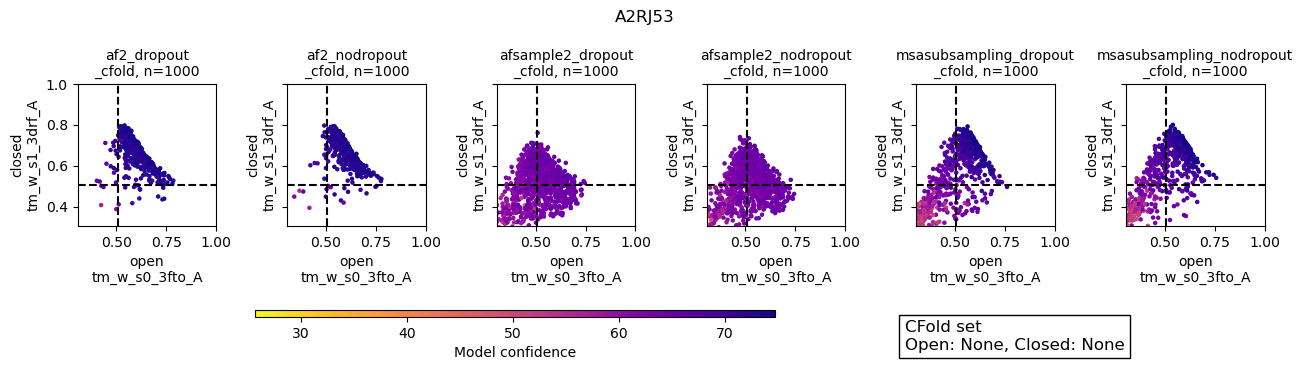

{'open': None, 'closed': None}
O76728


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


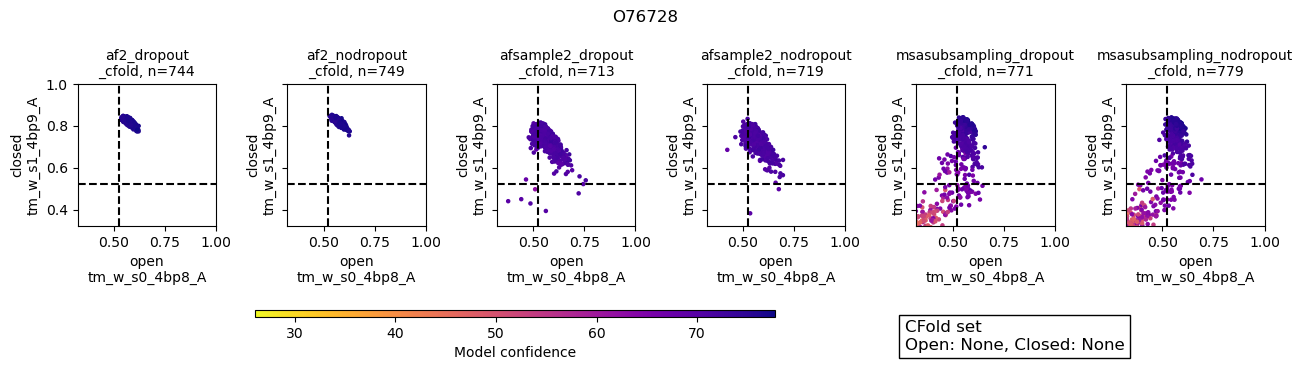

{'open': 'train', 'closed': 'test'}
P31133


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


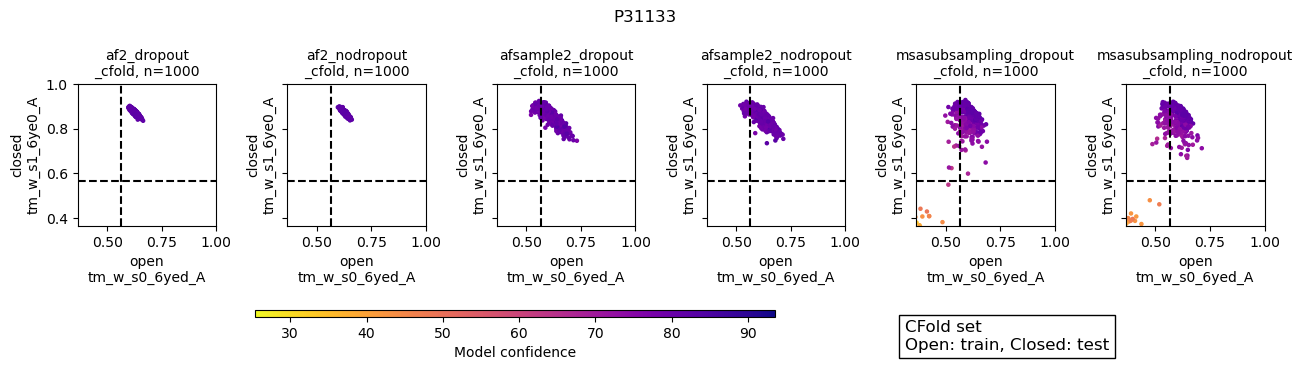

{'open': None, 'closed': None}
P00558


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


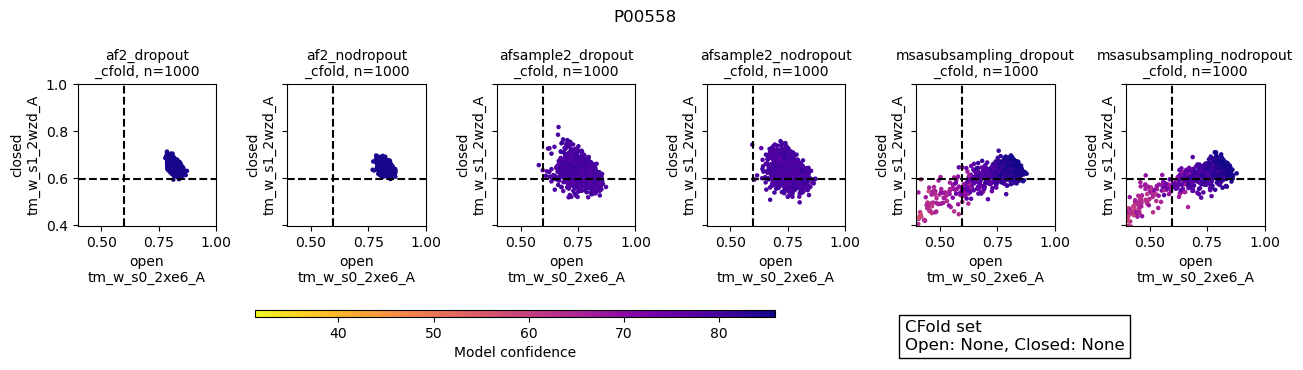

{'open': 'test', 'closed': None}
P40131


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


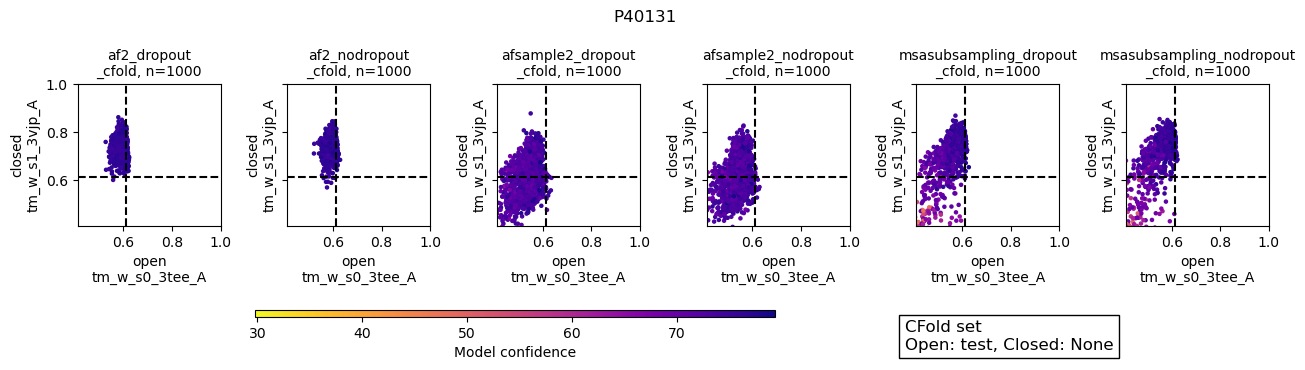

{'open': 'train', 'closed': 'test'}
Q7DAU8


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


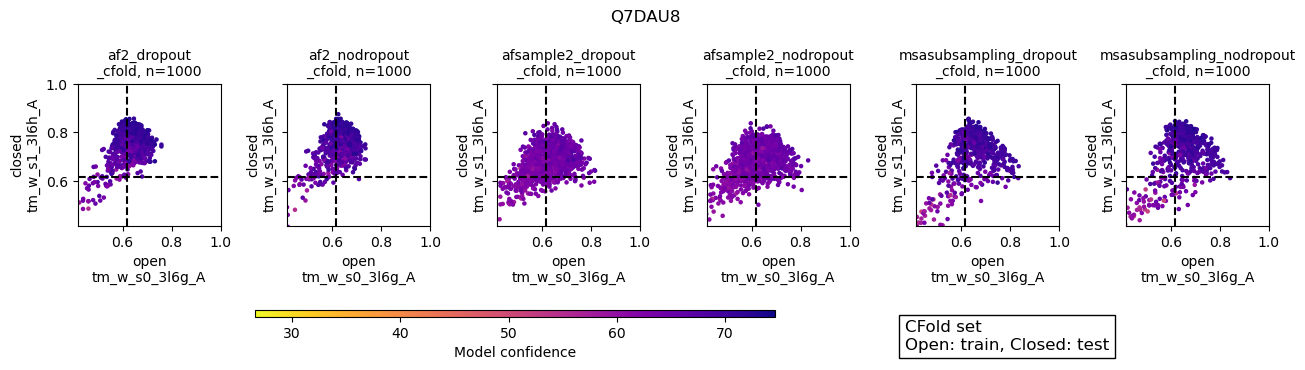

{'open': None, 'closed': None}
P21589


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


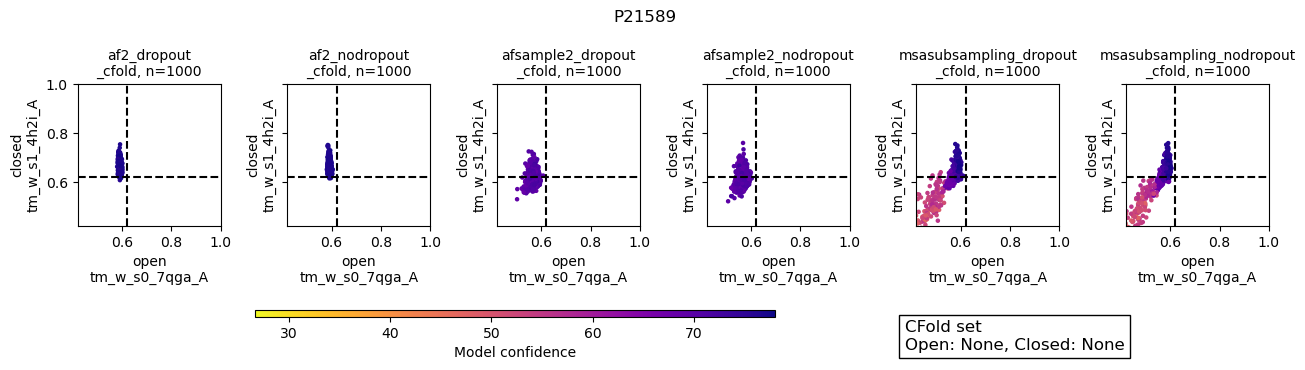

{'open': None, 'closed': None}
A0QTT2


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


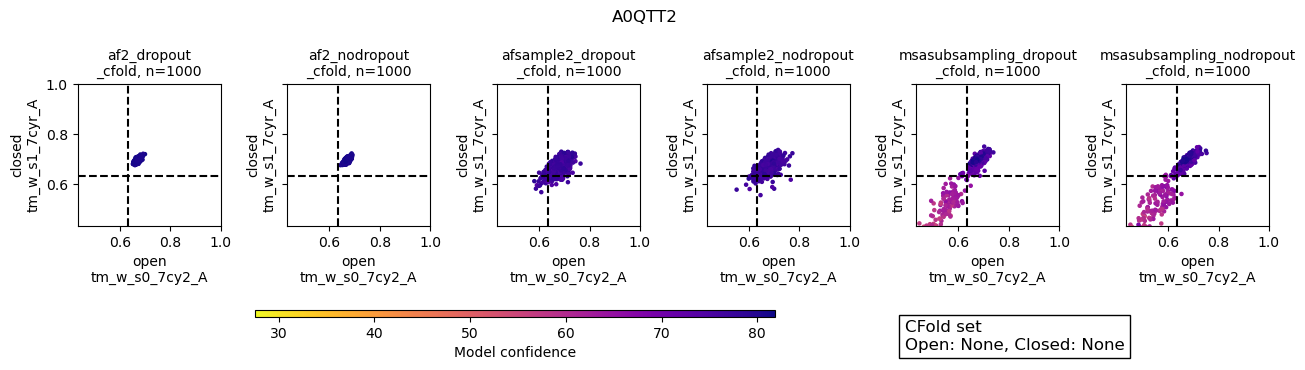

{'open': 'train', 'closed': 'test'}
Q5F9M1


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


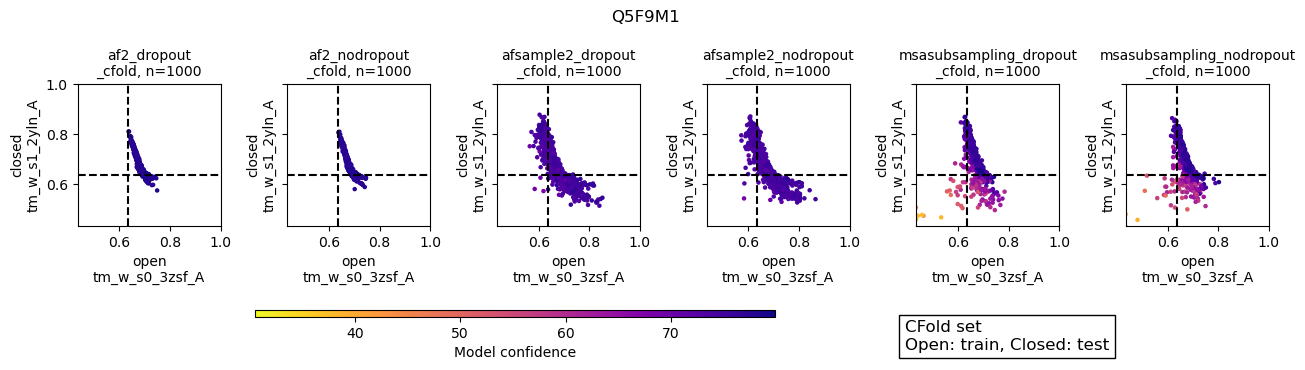

{'open': 'train', 'closed': 'train'}
Q9X6R4


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


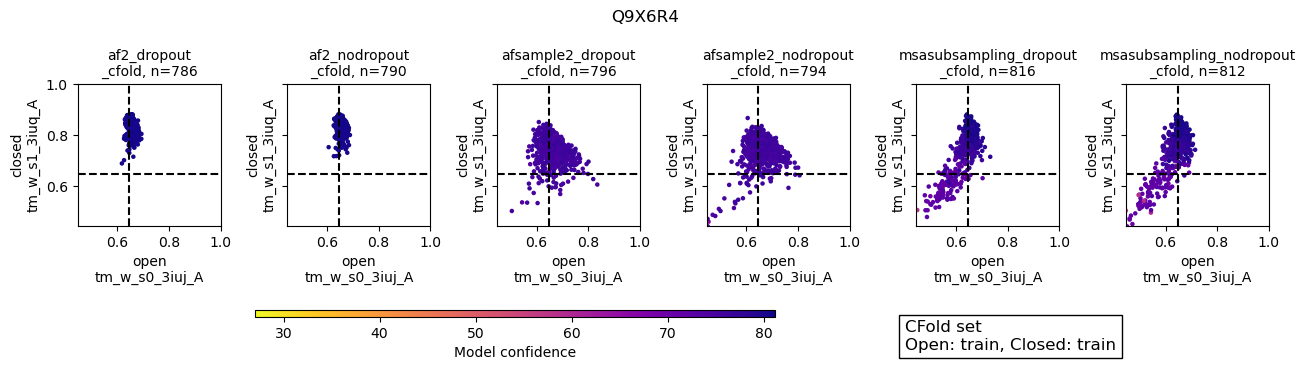

{'open': 'train', 'closed': 'test'}
Q18A65


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


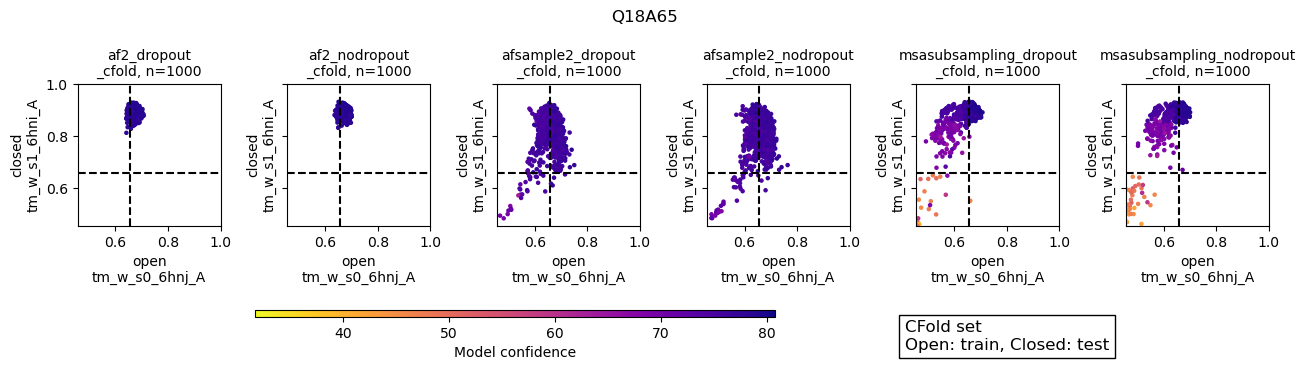

{'open': None, 'closed': None}
Q9ERE7


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


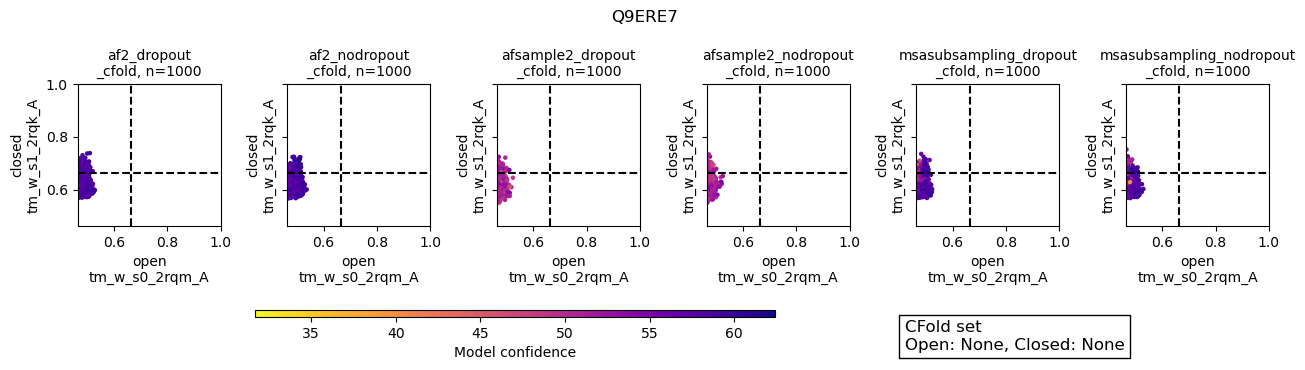

{'open': None, 'closed': None}
P62495


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


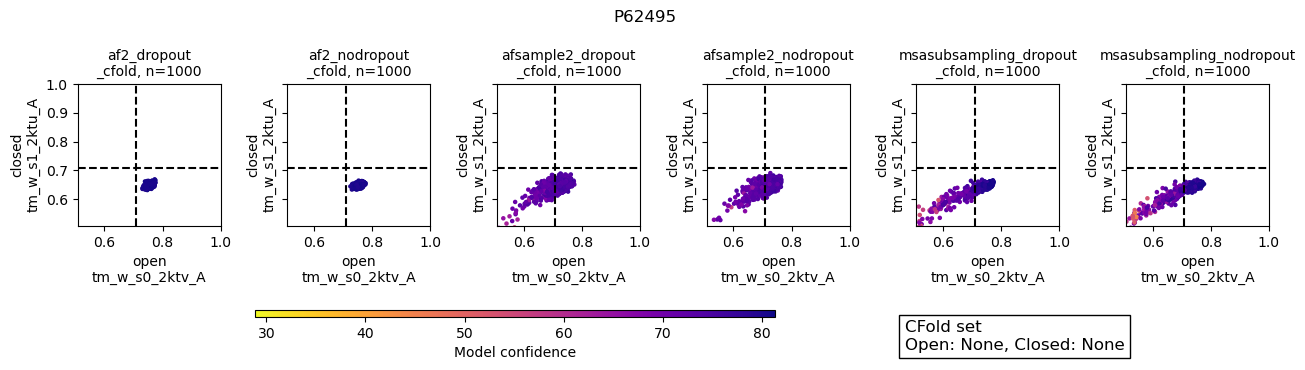

{'open': None, 'closed': None}
A0A075Q0W3


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


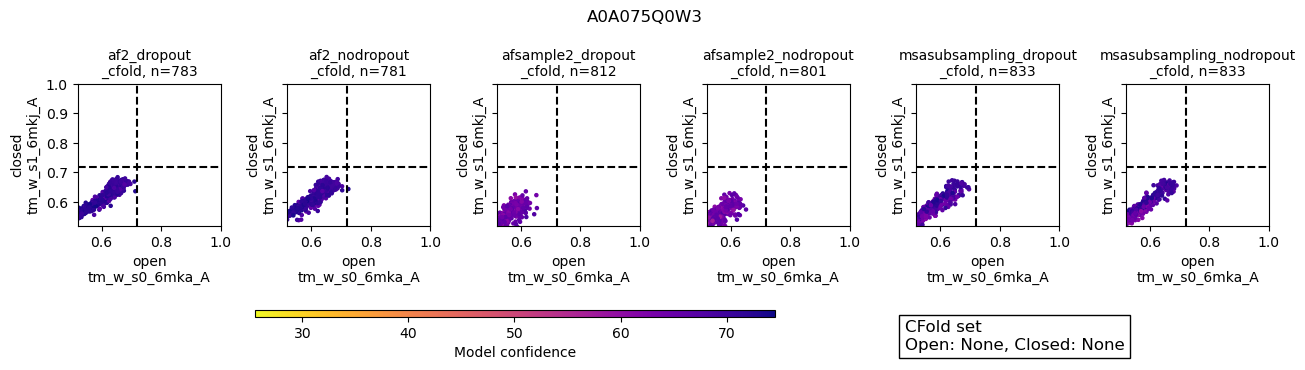

{'open': None, 'closed': None}
P71447


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


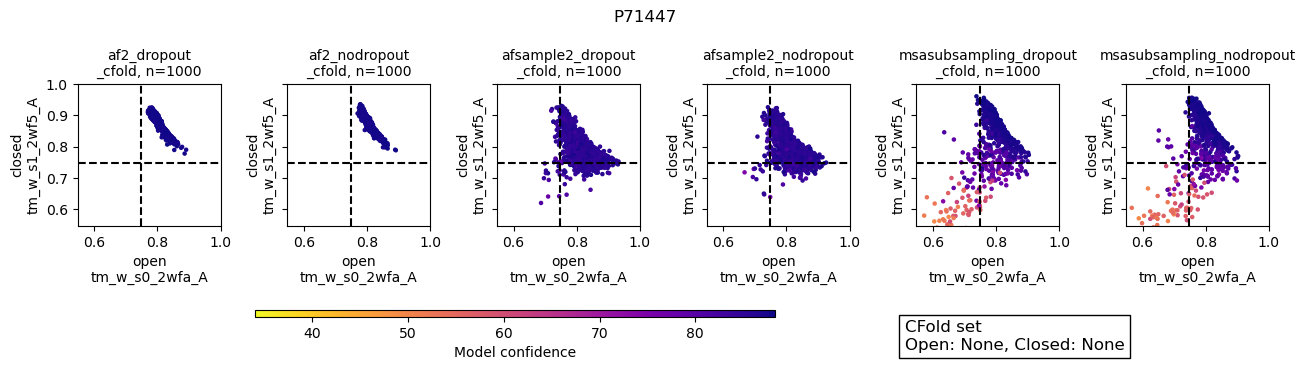

{'open': None, 'closed': None}
P33284


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


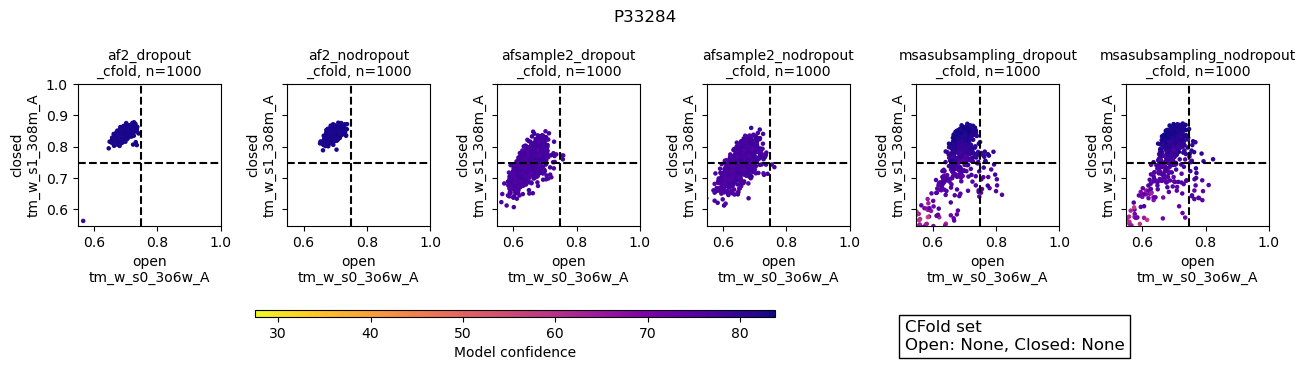

{'open': None, 'closed': None}
Q9Z4N6


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


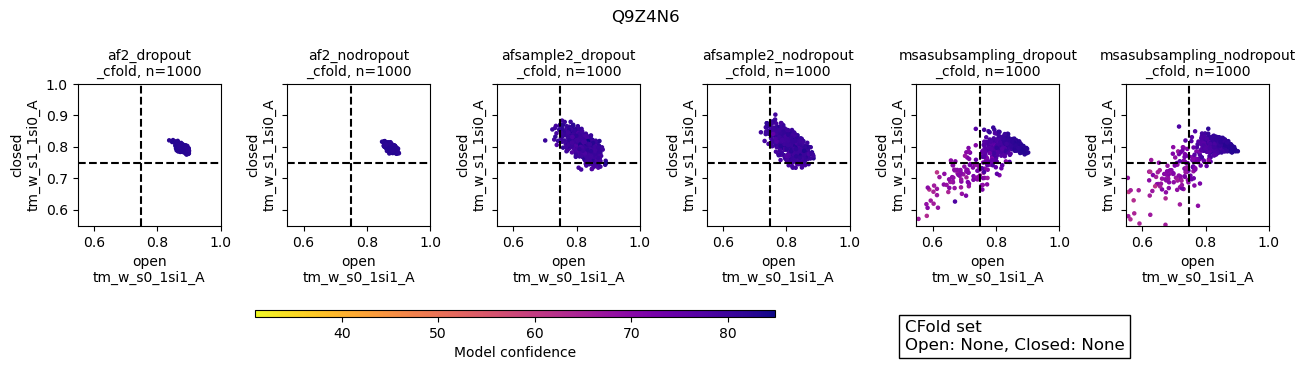

{'open': 'train', 'closed': 'train'}
A6UVT1


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


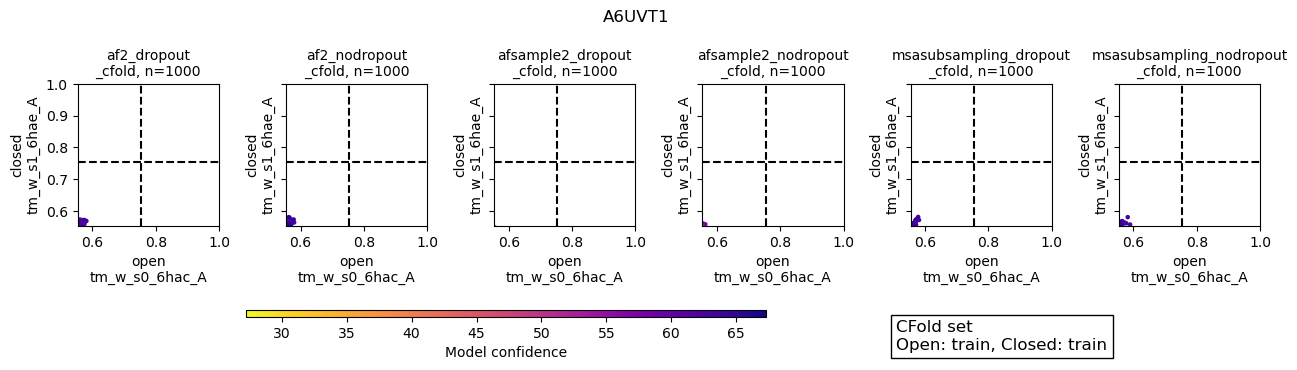

{'open': 'train', 'closed': 'test'}
B7IE18


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


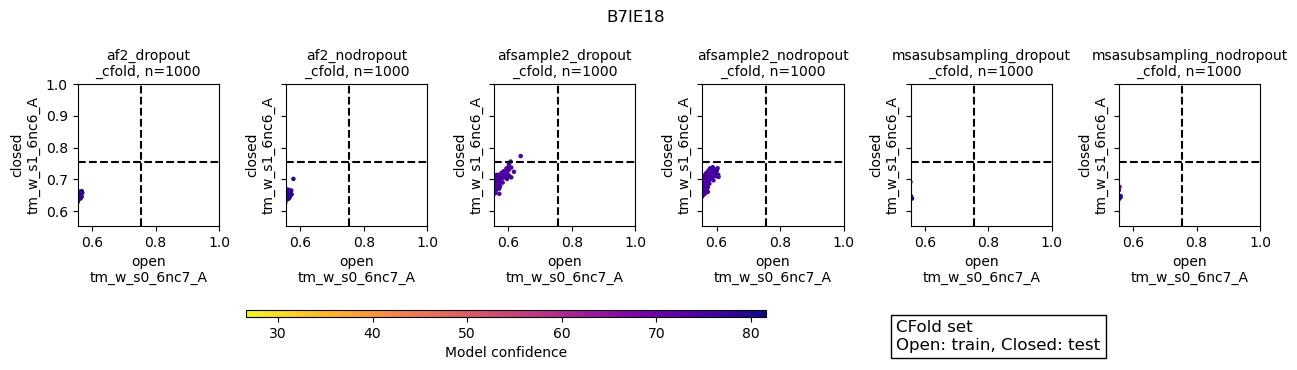

{'open': None, 'closed': None}
B3EYN2


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


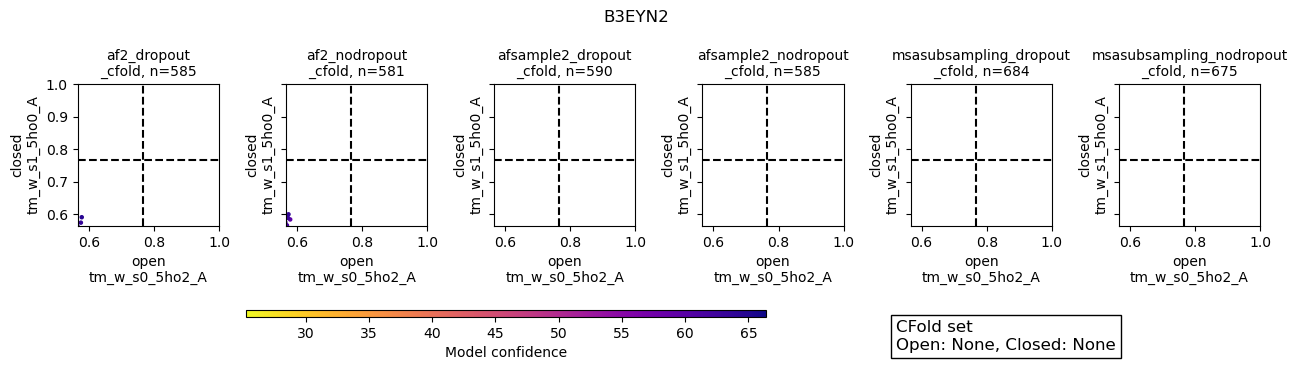

{'open': None, 'closed': None}
Q53W80


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


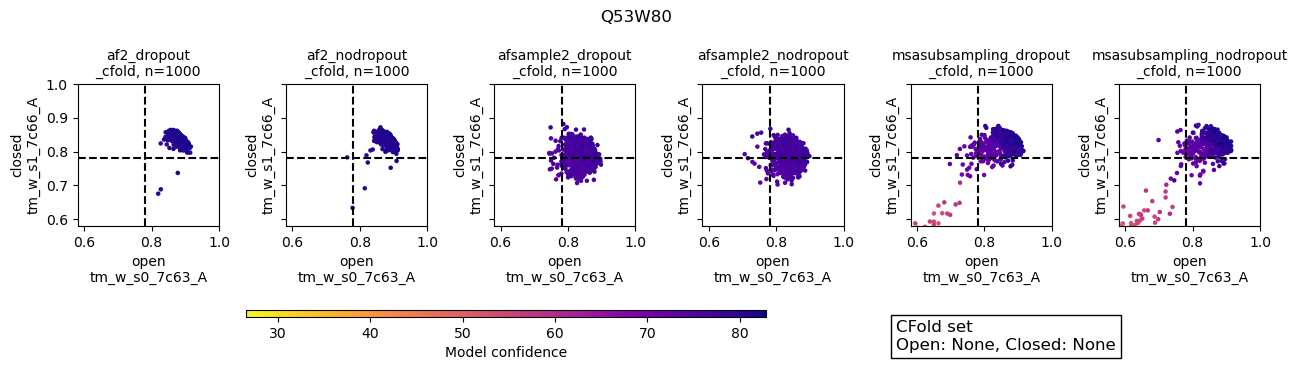

{'open': None, 'closed': None}
Q9SS90


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


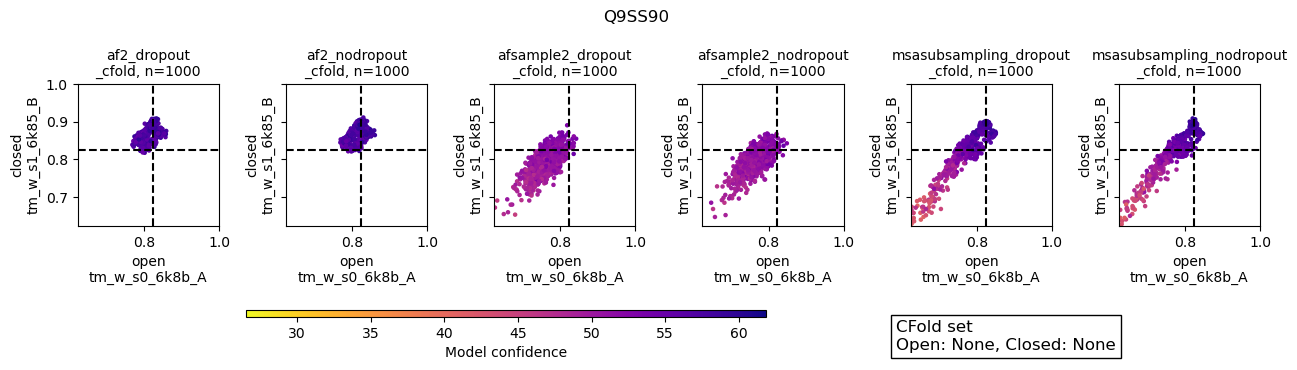

{'open': 'test', 'closed': 'test'}
Q9X9P9


/tmp/ipykernel_3194947/1920536349.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar


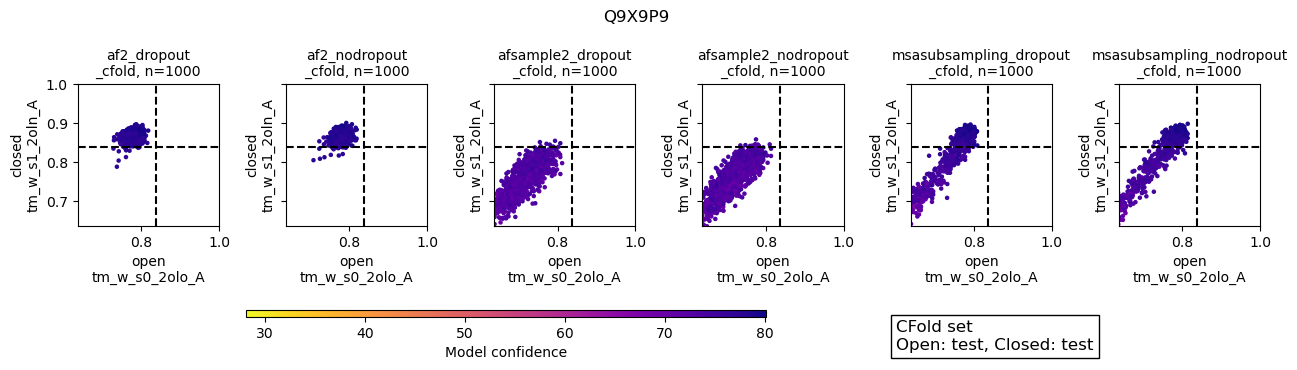

In [29]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os, glob
import pickle
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Load filtered dictionary
with open('../data/input_datasets/oc23/filtered_dict.pickle', 'rb') as handle:
    filtered_dict = pickle.load(handle)

# Initialize object
good_examples = {k: v for k, v in filtered_dict.items() if v and v[3] < 0.85}

outpath = '/proj/wallner-b/users/x_yogka/cfold/ablation/data/results/'
for protein in good_examples.keys():

    open_, closed_, *_ = good_examples[protein]
    open_ = open_.split('_')[0].upper()[:-1]
    closed_ = closed_.split('_')[0].upper()[:-1]
    d = {}
    if open_ in cfold_train_pdbs:
        d['open'] = 'train'
    elif open_ in cfold_test_pdbs:
        d['open'] = 'test'
    else:
        d['open'] = None

    if closed_ in cfold_test_pdbs:
        d['closed'] = 'test'
    elif closed_ in cfold_train_pdbs:
        d['closed'] = 'train'
    else:
        d['closed'] = None
    print(d)

    print(protein)
    csvs = glob.glob(f'{outpath}/*/*{protein}*')
    stacked_df = []
    for csv in csvs:
        df = pd.read_csv(csv)
        df['method']=df.model.str.split('/', expand=True)[10]
        df['network']=[model.split('unrelaxed')[-1].split('_')[1] for model in df.model]
        stacked_df.append(df)
    stacked_df = pd.concat(stacked_df)
    stacked_df['dropout']=[model.split('_')[-1].split('.')[0] for model in stacked_df.model.values]
    stacked_df['id'] = stacked_df['method']+'_'+stacked_df['dropout']+'_'+stacked_df['network']

    fig, axes = plt.subplots(1, 6, figsize=(13, 3.3), sharex=True, sharey=True)

    norm = plt.Normalize(stacked_df['confidence'].min(), stacked_df['confidence'].max())
    sm = plt.cm.ScalarMappable(cmap="plasma_r", norm=norm)
    sm.set_array([])  

    l1, l2 = [], []
    for a in stacked_df.id.unique():
        if 'cfold' in a:
            l2.append(a)

    l = sorted(l2)

    for id, ax in zip(l, axes):
        stacked_df_ = stacked_df[stacked_df.id == id]
        sc = ax.scatter(stacked_df_[stacked_df_.columns[4]], stacked_df_[stacked_df_.columns[5]], s=5, c=stacked_df_['confidence'], cmap='plasma_r', norm=norm)
        ax.set_xlabel('open\n'+stacked_df_.columns[4])
        ax.set_ylabel('closed\n'+stacked_df_.columns[5])
        ax.set_title('_'.join(id.split('_')[:2])+'\n'+id.split('dropout')[1]+f', n={len(stacked_df_[stacked_df_.id == id])}', fontsize=10)
        ax.set_xlim([good_examples[protein][3]-0.2, 1])
        ax.set_ylim([good_examples[protein][3]-0.2, 1])
        ax.axvline(x=good_examples[protein][3], ls='--', color='black')
        ax.axhline(y=good_examples[protein][3], ls='--', color='black')
        #sc.legend_.remove()

    # Create a new axis for the colorbar below the entire plot
    cbar_ax = fig.add_axes([0.2, 0.05, 0.4, 0.02])  # [left, bottom, width, height]

    # Add colorbar to the new axis
    fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")

    # Label the colorbar
    cbar_ax.set_xlabel("Model confidence")
    fig.text(0.7, -0.05, f"CFold set\nOpen: {d['open']}, Closed: {d['closed']}", fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
    fig.suptitle(protein)
    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit colorbar
    plt.show()


In [44]:
stacked_df[stacked_df.id == 'afsample2_nodropout_cfold'].confidence.max(), stacked_df[stacked_df.id == 'afsample2_nodropout_cfold'].confidence.min()

(84.0068108108108, 76.51635135135135)

In [7]:
stacked_df.id.unique()

array(['af2_dropout_cfold', 'af2_nodropout_cfold', 'af2_dropout_model',
       'af2_nodropout_model', 'afsample2_dropout_cfold',
       'afsample2_nodropout_cfold', 'afsample2_dropout_model',
       'afsample2_nodropout_model', 'msasubsampling_nodropout_model',
       'msasubsampling_dropout_model', 'msasubsampling_nodropout_cfold',
       'msasubsampling_dropout_cfold'], dtype=object)

(0.5, 1.0)

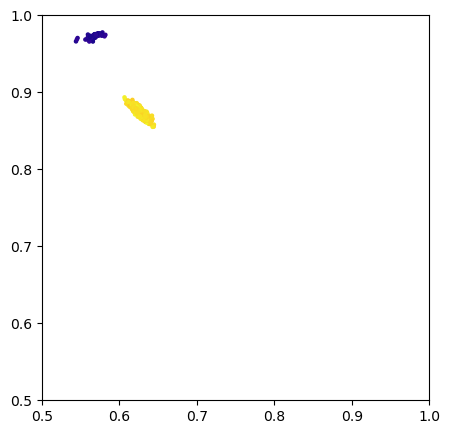

In [66]:
df = pd.read_csv('/proj/wallner-b/users/x_yogka/cfold/ablation/data/results/msasubsampling/final_df_P31133_2_states.csv')
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.scatter(df['tm_w_s0_6yed_A'], df['tm_w_s1_6ye0_A'], c=df['confidence'], cmap='plasma_r', s=5)
ax.set_xlim([0.5, 1])
ax.set_ylim([0.5, 1])


In [67]:
df

model  confidence  \
0     /proj/wallner-b/users/x_yogka/cfold/ablation/d...   81.968162   
1     /proj/wallner-b/users/x_yogka/cfold/ablation/d...   92.912162   
2     /proj/wallner-b/users/x_yogka/cfold/ablation/d...   81.772027   
3     /proj/wallner-b/users/x_yogka/cfold/ablation/d...   82.178027   
4     /proj/wallner-b/users/x_yogka/cfold/ablation/d...   81.796027   
...                                                 ...         ...   
2115  /proj/wallner-b/users/x_yogka/cfold/ablation/d...   82.088162   
2116  /proj/wallner-b/users/x_yogka/cfold/ablation/d...   82.108459   
2117  /proj/wallner-b/users/x_yogka/cfold/ablation/d...   81.988243   
2118  /proj/wallner-b/users/x_yogka/cfold/ablation/d...   82.123054   
2119  /proj/wallner-b/users/x_yogka/cfold/ablation/d...   82.167405   

      tm_w_best  rm_w_best  tm_w_s0_6yed_A  tm_w_s1_6ye0_A protein  
0       0.82586       1.74         0.61806         0.88210  P31133  
1       0.95975       1.08         0.56799         0.97276  P31133  
2       0.82628       1.79         0.61722         0.88320  P31133  
3       0.81916       1.80         0.62369         0.87529  P31133  
4       0.81459       1.88         0.62816         0.87365  P31133  
...         ...        ...             ...             ...     ...  
2115    0.81207       1.96         0.63258         0.86898  P31133  
2116    0.80980       1.77         0.63384         0.86822  P31133  
2117    0.81079       1.95         0.62652         0.86889  P31133  
2118    0.82633       1.85         0.61850         0.88263  P31133  
2119    0.82131       1.78         0.62193         0.87856  P31133  

[2120 rows x 7 columns]

In [17]:
df.model.str.split('/', expand=True)

0     1          2      3        4      5         6     7      8   \
0        proj  wallner-b  users  x_yogka  cfold  ablation  data  afout   
1        proj  wallner-b  users  x_yogka  cfold  ablation  data  afout   
2        proj  wallner-b  users  x_yogka  cfold  ablation  data  afout   
3        proj  wallner-b  users  x_yogka  cfold  ablation  data  afout   
4        proj  wallner-b  users  x_yogka  cfold  ablation  data  afout   
...  ..   ...        ...    ...      ...    ...       ...   ...    ...   
2010     proj  wallner-b  users  x_yogka  cfold  ablation  data  afout   
2011     proj  wallner-b  users  x_yogka  cfold  ablation  data  afout   
2012     proj  wallner-b  users  x_yogka  cfold  ablation  data  afout   
2013     proj  wallner-b  users  x_yogka  cfold  ablation  data  afout   
2014     proj  wallner-b  users  x_yogka  cfold  ablation  data  afout   

          9               10                                           11  
0     P31133  msasubsampling  unrelaxed_cfold_pred_120_5120_nodropout.pdb  
1     P31133  msasubsampling    unrelaxed_model_1_pred_1_32_nodropout.pdb  
2     P31133  msasubsampling     unrelaxed_cfold_pred_34_16_nodropout.pdb  
3     P31133  msasubsampling     unrelaxed_cfold_pred_86_5120_dropout.pdb  
4     P31133  msasubsampling   unrelaxed_cfold_pred_66_5120_nodropout.pdb  
...      ...             ...                                          ...  
2010  P31133  msasubsampling      unrelaxed_cfold_pred_94_256_dropout.pdb  
2011  P31133  msasubsampling     unrelaxed_cfold_pred_39_1024_dropout.pdb  
2012  P31133  msasubsampling      unrelaxed_cfold_pred_23_512_dropout.pdb  
2013  P31133  msasubsampling    unrelaxed_cfold_pred_33_256_nodropout.pdb  
2014  P31133  msasubsampling     unrelaxed_cfold_pred_82_5120_dropout.pdb  

[2015 rows x 12 columns]

In [15]:
df.model.str.split('_', expand=True)
for model in df.model:
    if 'model' in model:
        
        print(model.split('unrelaxed')[-1].split('pred')[0])
        print(model.split('_')[-1].split('.')[0])
        break



_model_1_
nodropout


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os, glob
import pickle
from matplotlib.backends.backend_pdf import PdfPages

# Load filtered dictionary
with open('../data/input_datasets/oc23/filtered_dict.pickle', 'rb') as handle:
    filtered_dict = pickle.load(handle)

# Initialize object
good_examples = {k: v for k, v in filtered_dict.items() if v and v[3] < 0.85}

outpath = '/proj/wallner-b/users/x_yogka/cfold/ablation/data/results/'
pdf_filename = "all_plots.pdf"

with PdfPages(pdf_filename) as pdf:
    for protein in good_examples.keys():
        print(protein)
        csvs = glob.glob(f'{outpath}/*/*{protein}*')
        stacked_df = []
        
        for csv in csvs:
            df = pd.read_csv(csv)
            df['method'] = df.model.str.split('/', expand=True)[10]
            df['network'] = df.model.str.split('_', expand=True)[2]
            stacked_df.append(df)
        
        stacked_df = pd.concat(stacked_df)
        stacked_df['dropout'] = [model.split('_')[-1].split('.')[0] for model in stacked_df.model.values]
        stacked_df['id'] = stacked_df['method'] + stacked_df['dropout']

        fig, axes = plt.subplots(1, 6, figsize=(20, 2.9), sharex=True, sharey=True)
        norm = plt.Normalize(stacked_df['confidence'].min(), stacked_df['confidence'].max())
        sm = plt.cm.ScalarMappable(cmap="plasma_r", norm=norm)
        sm.set_array([])  

        for id, ax in zip(stacked_df.id.unique(), axes):
            sc = sns.scatterplot(
                x=stacked_df.columns[4],    
                y=stacked_df.columns[5], 
                data=stacked_df[stacked_df.id == id], 
                ax=ax, 
                hue='confidence', 
                palette='plasma_r', 
                linewidth=0,
                s=7
            )
            ax.set_title(id + f'\nn={len(stacked_df[stacked_df.id == id])}')
            ax.set_xlim([good_examples[protein][3] - 0.2, 1])
            ax.set_ylim([good_examples[protein][3] - 0.2, 1])
            ax.axvline(x=good_examples[protein][3], ls='--', color='black')
            ax.axhline(y=good_examples[protein][3], ls='--', color='black')
            sc.legend_.remove()

        cbar = fig.colorbar(sm, ax=axes, orientation="vertical", fraction=0.02, pad=0.04)
        cbar.set_label("Confidence")

        # Save current figure to the PDF
        plt.suptitle(protein, y=1.1)
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)
print(f"All plots saved in {pdf_filename}")


A2RJ53
O76728
P31133
P00558
P40131
Q7DAU8
P21589
A0QTT2
Q5F9M1
Q9X6R4
Q18A65
Q9ERE7
P62495
A0A075Q0W3
P71447
P33284
Q9Z4N6
A6UVT1
B7IE18
B3EYN2
Q53W80
Q9SS90
Q9X9P9
All plots saved in all_plots.pdf


In [98]:
stacked_df.id.unique()

array(['af2dropout', 'af2nodropout', 'cfold_ogpred', 'afsample2dropout',
       'afsample2nodropout', 'msasubsamplingnodropout',
       'msasubsamplingdropout'], dtype=object)

In [96]:
pd.read_csv('/proj/wallner-b/users/x_yogka/cfold/ablation/data/results/cfold_og/final_df_P31133_2_states.csv').model.values

array(['/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/cfold_og/P31133_512_50_pred.pdb',
       '/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/cfold_og/P31133_512_34_pred.pdb',
       '/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/cfold_og/P31133_512_14_pred.pdb',
       '/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/cfold_og/P31133_512_28_pred.pdb',
       '/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/cfold_og/P31133_512_43_pred.pdb',
       '/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/cfold_og/P31133_512_49_pred.pdb',
       '/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/cfold_og/P31133_512_17_pred.pdb',
       '/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/cfold_og/P31133_512_7_pred.pdb',
       '/proj/wallner-b/users/x_yogka/cfold/ablation/data/afout/P31133/cfold_og/P31133_512_23_pred.pdb',
       '/proj/wallner-b/users/x_yogka/cfold/ablation/dat

In [28]:
stacked_df.model.str.split('/', expand=True)[11].str.split('pred', expand=True)

0                      1
0     unrelaxed_cfold_       _522_dropout.pdb
1     unrelaxed_cfold_      _33_nodropout.pdb
2     unrelaxed_cfold_       _126_dropout.pdb
3     unrelaxed_cfold_     _724_nodropout.pdb
4     unrelaxed_cfold_     _458_nodropout.pdb
...                ...                    ...
1527  unrelaxed_cfold_     _58_32_dropout.pdb
1528  unrelaxed_cfold_     _24_32_dropout.pdb
1529  unrelaxed_cfold_    _94_256_dropout.pdb
1530  unrelaxed_cfold_    _23_512_dropout.pdb
1531  unrelaxed_cfold_  _33_256_nodropout.pdb

[4843 rows x 2 columns]